<h1 style="color:#ffc0cb;font-size:70px;font-family:Roboto;text-align:center;"><strong>Assignment 1</strong></h1>
<h2 style="color:#ffc0cb;font-size:70px;font-family:Roboto;text-align:center;"><strong>Sepsis Prediction</strong></h2>

### <b>Student Name: Bui Minh Nhat</b>
### <b>Student ID: s3878174</b>
### <b>Course: COSC2753 - Machine Learning</b>
### <b>Lecturer: Dr. Nguyen Thien Bao</b>



## Table of Content

### 1. [Preparing Data](#1)

1.1 [Introduction](#1.1) 

1.2 [Target question for insights](#1.2)

1.3 [Importing Necessary Libraries and datasets](#1.3)

1.4 [Data Retrieving](#1.4)

1.5 [Data information](#1.5)

<br>

### 2. [Data Cleaning](#2)

2.1 [Dataset Insight](#2.1)

2.2 [Drop column](#2.2)

2.3 [Typo check](#2.3)

2.4 [Reame columns](#2.4)

2.5 [Missing Values](#2.5)

> - 2.5.1 [Check missing values](#2.5.1)
> - 2.5.2 [Fill missing values](#2.5.1)  
>> - 2.5.2.a [Filling missing values for Embarked Feature](#2.5.2.a)
>> - 2.5.2.b [Filling missing values for Cabin Feature](#2.5.2.b)
>> - 2.5.2.c [Filling missing values for Fare Feature](#2.5.2.c)
>> - 2.5.2.d [Filling missing values for Age Feature](#2.5.2.d)

2.6 [Data type](#2.6)

2.7 [Upper Case the content](#2.7)

2.8 [Extra-whitespaces](#2.8)

2.9 [Descriptive statistics for Central Tendency](#2.9)

2.10 [Detect Outlier](#2.10)

2.11 [Save The Intermediate Data](#2.11)

<br>

### 3. [Data Exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

3.2 [Frequency of each corresponiding Target variable type](#3.2)

3.3 [Statistical Overview](#3.3)

3.4 [Correlation Matrix and Heatmap](#3.4)

<br>

### 4. [Feature Engineering](#4)

4.1 [Separating dependent and independent variables](#4.1)

4.2 [Encoding](#4.2)

> - 4.2.1 [Binary Encoding for Name and Ticket Feature:](#4.2.1)
> - 4.2.2 [Binary Encoding for Embarked Feature:](#4.2.2)

4.3 [Separating dependent and independent variables](#4.3)

4.4 [Splitting the training data](#4.4)

4.5 [Feature Scaling](#4.5)

<br>

### 5. [Model Building](#5) 

5.1 [Logistic Regression](#5.1)

> - 5.1.1 [Logistic Regression without GridSearch](#5.1.1)
>> - 5.1.1.a [Train model](#5.1.1.a) 
>> - 5.1.1.b [Evaluating a classification model](#5.1.1.b) 
> - 5.1.2 [Logistic Regression with GridSearch](#5.1.2)
>> - 5.1.1.a [Train model](#5.1.1.a) 
>> - 5.1.1.b [Evaluating a classification model](#5.1.1.b) 


<br>

### 6. [Conculsions](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Preparing data</strong></h1>

<a id="1.1"></a>
# ️1.1 Introduction
****

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">Intensive care units (ICUs) are under continual pressure to keep an eye on their patients for signs of sepsis (an infection that can accrue while staying in ICU). While this problem has existed for a long time, the recent COVID-19 outbreak has brought it to the forefront. The capacity to forecast if a patient in the ICU may develop sepsis is extremely useful for an ICU. This would aid in lowering the danger of health issues as well as controlling ICU resources (such as bed availability, etc.).
</p>
-----Cite this---------
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> 
</p>

<a id="1.2"></a>
# ️1.2 Target question for insights
****

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Which <span style="color:#122ecc;">City</span> in US has reported most no. of Accident Cases in last 5 years (2016-2020) ?</li>
    <li>Which are the <span style="color:#122ecc;">top 10 accident prone streets</span> in US ?</li>
    <li>Per Day <span style="color:#122ecc;">averagely how many road accidents</span> took placed in US ?</li>
    <li>In which <span style="color:#122ecc;">hours</span> of the <span style="color:#122ecc;">day most accidents</span> happened in US ?</li>
    <li>How are the basic <span style="color:#122ecc;">weather conditions</span> in <span style="color:#122ecc;">most</span> of the <span style="color:#122ecc;">accident cases</span> in US ?</li>  
    <li>Which are the <span style="color:#122ecc;">top 10 States</span> with <span style="color:#122ecc;">most no. of road accident cases</span> in US ?</li> 

</ul>

<a id="1.3"></a>
# 1.3 Importing Necessary Libraries and datasets
****

In [1]:
# #For Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import libraries which are pandas and numpy
# !pip install pandas && pip install numpy && pip install seaborn && pip install matplotlib && pip install sklearn
import pandas as pd
import numpy as np
#For Encoding
#for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 15,10

#Ploting module

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #
# scatter matrix library
from pandas.plotting import scatter_matrix

#set display 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

<a id="1.4"></a>

> Bloc en retrait


# 1.4 Data Retrieving
***
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> 
First, import the dataset using read_csv function. In order to ensure the from the csv file is in good shape, we have to eliminate the extra white space. After that, the data types must be checked to ensure no incorrect data types assigned. After finishing verifying the datatypes, the ingested data is cleaned by the following steps: typos, extra-whitespaces, cases, sanity checks, check for missing values, and identifying categorical data. </p>


> **train Dataset**

In [3]:
# import data using functions of pandas
#Inside pandas.read_csv() method skipinitialspace parameter is use to skip initial space present in the dataframe. 
#By default, it is False, so skipinitialspace must be True to skip the whitespace.
train_df = pd.read_csv("./data/Paitients_Files_Train.csv", delimiter=',', skipinitialspace = True)

train_df.columns = train_df.columns.str.replace(' ', '') #strip the extra-whitespaces out

#Showing the head of the dataset
train_df.head(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
#Showing tail of the data set
train_df.tail(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


> **Sample test Dataset**

In [5]:
test_df = pd.read_csv("./Data/Paitients_Files_Test.csv", delimiter=',', skipinitialspace = True)

test_df.columns = test_df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("Rows and Collumns of dataset", str(test_df.shape))

test_df.head(5)

Rows and Collumns of dataset (169, 10)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [6]:
#Show the tail of the dataset
test_df.tail(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1
168,ICU200777,1,93,70,31,0,30.4,0.315,23,1


<a id="1.3"></a>
# 1.3 Data Information

> **Column name and datatype of train Dataset**

In [7]:
#Basic information of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


> **Column name and datatype of test Dataset**

In [8]:
#Basic information if the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


# About the datasets
For this data set : the train dataset have 11 collumn and 599 rows and the test dataset have 169 row and 10 collumn. 
<p> There are 2 kind of data group for this dataset</p>
<ul><li>Trainning dataset Paitients_Files_Train.csv</li>
    <li>Testing dataset: Paitients_Files_Test.csv</li>
 </ul>
<p>As can be observe , the major data type for both training and testing data set are</p>
<ul><li>int64 : PRG, PL, PR, SK, TS, AGE, Insurance</li>
    <li>float64 : M11 , BD2</li>
    <li> object : ID for both dataset and Sepsis for the training data set </li>
</ul>
<p>The target variable for this assingment is Sepsis (we have typo Seppsis in the train dataset). After viewing the dataset, the Sepsis column have value either Negative or Positive which is a kind of categorical data therefore we can conclude that this is a classification Problems.</p>

# Datafield definition :
According to the `README.MD` file of the dataset the definition of the table is as follow
<ul>
<li>ID : Uniue number to represent patient</li>
<li>PRG: Plasma glucose </li>
<li>PL: Blood Work Result-1 (mu U/ml)</li>
<li>PR: Blood Pressure (mm Hg)</li>
<li>SK: Blood Work Result-2 (mm) </li>
<li>TS: Blood Work Result-3 (mu U/ml)</li>
<li>M11: Body mass index (weight in kg/(height in m)^2</li>
<li>BD2:  Blood Work Result-4 (mu U/ml)</li>
<li>Age:  patients age  (years)</li>
<li>Insurance: If a patient holds a valid insurance card</li>
<li> Sepssis (target): Positive: if a patient in ICU will 
develop a sepsis , and Negative: otherwise </li>


</ul>

## Domain knowledge

<a id="2.3"></a>
# 2.3 Exploratory Data Analysis
***

<a id="2.3.1"></a>
## 2.3.1 Statistics of the datasets

A. We need to verifying the numerical data of the dataset

In [9]:
#Showing all of the important statistic of the datasets.
train_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the initial observation, the `count` value of all of the columns in the `train` dataset are all having the same value of 599 (which is equal to the size of the dataset) indicating there are no missing values occurs in all of the column of the dataset.

* With `PRG` column, the median value of the column is equal to 3.824, however the value of the 75 percentile is 6 and the `maximum` value is 17 which is larger than the 75 percentile therefore indicating a negative skew

* For the `PL` column of the train dataset, we can observe that the mean value of the collumn is equal to 120.153589, the 25% percentile is 99, the 75 % percentile is 140 there for we could say that this column have a normal distribution

* For `PR` column, the mean value of this column from the above mentioned table is 68.732888 (mu U/ml). The 25 % percentile of the column is 64 (mu U/ml), the 75% percenttile for the dataset is 80 (mu U/ml), indicating a normal distribution

* For `SK` column, we could observe that the mean value (which is 20.562604), the 25 % percentile of 0, 75 % percentile is 32. However the max value = 99 made this column have a negative skew. However this also indicating a potential for outlier. 

* Regarding the `TS` column the mean value 76.460768 However the 25% percentile is 0 and the 75 % percentile quartile is equal to 123.5. However the max value is 846 as well as more than 50% of the patient have the level of TS equal to 36 thus causing a negative skill. Furthermore, the max TS value is 800 which is the outlier of the `TS` column

* `M1ll` As can observe, the mean value is equal to 31.920033	(kg/m^2). There are also 25% of patient whoe have the BMI of 36.550000 (kg/m^2). The max value of the BMI is 67.1 (kg/m^2)



* From the `BD2` we can be observe the mean value of the BD2 column is 0.481187 (mu U/ml). The 25% percentile is 0.248 and the 75% percentile is equal to 0.647000 (mu U/ml) however the max value is 2.420000 (mu U/ml) which resulting in a negative skew

* With `Age` column , we can observe that the mean age of is equal to 33.290484. There are 75 % of patient who are 24 year old as well as 25 % patients who are 40 year old. The max age is 80 year old. Therefore resulting in a negative skew

The initial observation is verified using the histogram and boxplot

`Insurance`

<module 'matplotlib.pyplot' from '/Users/nhatbuiminh/opt/anaconda3/envs/ProjectNew/lib/python3.10/site-packages/matplotlib/pyplot.py'>

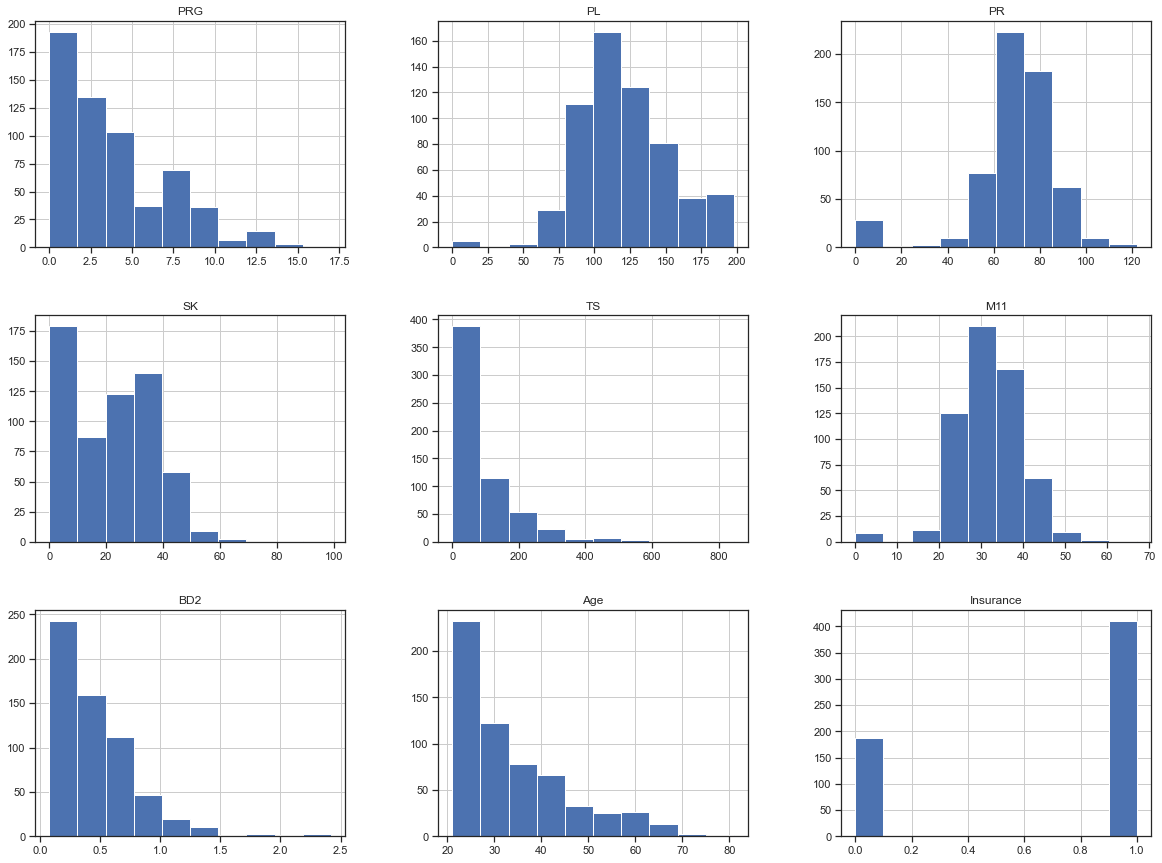

In [10]:
plt.rcParams['figure.figsize'] = [20, 15]
train_df.hist()
plt

From the observation, we can classified the skewness of each column are :
 <ul>
 <li>Left skew :  `PRG`, `SK`, `Age` and `BD2` </li>
 <li>Normal distribution value are `PL` , `PR`, `Mll`</li>
 </ul>

## B. Examine the test dataset

In [11]:
test_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


The test dataset consist of 9 column, each column have the value count of 169 which is consistance through out all of the column of the dataset which indicate there is no missing value.

* `PRG` : As can be be observe, the min value of the `PRG` Column have the `mean` value of 3.917160, the `min` value of 0 and the `max` value of 13. Regarding to the `quartile` of the dataset, `25 % ` percentile of patient have the `PRG` level = 1 1, `50%` percentile of patient have the `PRG` level equal to 3 which slightly less than the `mean` value and `75 %` percentile patient have the `PRG` level of 6. This indicate a left skew. 


* `PL`: For the abovemention `PL` column the `mean` value is 123.520710 (mu U/ml), the `min` value is 56 (mu U/ml) and the `max` value is 199 (mu U/ml). For the `25 % percentile`, the `PL` level is 102 (mu U/ml), the `50 % percentile` is 120(mu U/ml) and the `75 % percentile` is 80 (mu U/ml). This indicate a normal distribution.
<br>


* `PR`: The mean value for `PR` column is 70.426036 (mmHg), the min value is 0 (mmHg) which potentially outliers, the max value is 114 (mmHg). Regarding the quartile of this column, 75 %  of patient have the blood pressure of 62 (mmHg), 50% percent of patient have the blood pressure of 74 (mmHg) and 25 % of patient have the blood pressure of 80 (mmHg). This indicating a skew right.


* `SK` For the `SK` column, the mean value is  20.443787 (mm), the max value is 49 (mm) and min value of 0 (mm). Furthermore 25% percentile of patient have the Blood Work Result-2 of 0 (mm), 50% percentile of patient have the value of 23 (mm) and 75% percentitle of patient have the `SK` value of 32 (mm). This indicating a slightly skew right.


* `TS` For the Blood Work Result-3, we have `mean` value of 81 (mu U/ml), the `max` value of 540 (mu U/ml). Regarding the quartile, 75% of patient have the Blood Work Result-3 equal 0, 50% of the patient have the quartile is 0 and the 25% of patient have the level of 135(mu U/ml). This indicating a left skew


* `Mll`: For the `Mll` column, the `mean` value of 32.249704 (kg/m^2) `max` value of 57.3 (kg/m^2) and the `min` value is 0. Regarding the quartile the distribution `25% percentile` of patient have the BMI value of 27.6 (kg/m^2), `50% percentile` of patient is 32.4 (kg/m^2) and `75% percentile` patient is 36.6 (kg/m^2). This indicating a normal distribution


* `BD2`: The blood work result have the mean value of 0.438876 (mu U/ml), the max value of 1.698 (mu U/ml) and the min value of 0.1 (mu U/ml). Regarding the value of the quartile of the column, 75 % of the patient have the `BD2` index of 0.223, 50% of the patient have the `BD2` value of 0.343 (mu U/ml) and 25 % of patient take the value of 0.587 (mu U/ml)


* `Age`: Regarding the age of the patient, the mean value is 33.065089, the maximum age is 70 and the minimum age of 21. The 25 % percentile is 24 years old, the 50% percentile is 28 year old and the 75 % percentile is 42 year old which indcating a left skew.


* Insurance is a categorical column which take the value of either 0 or 1 

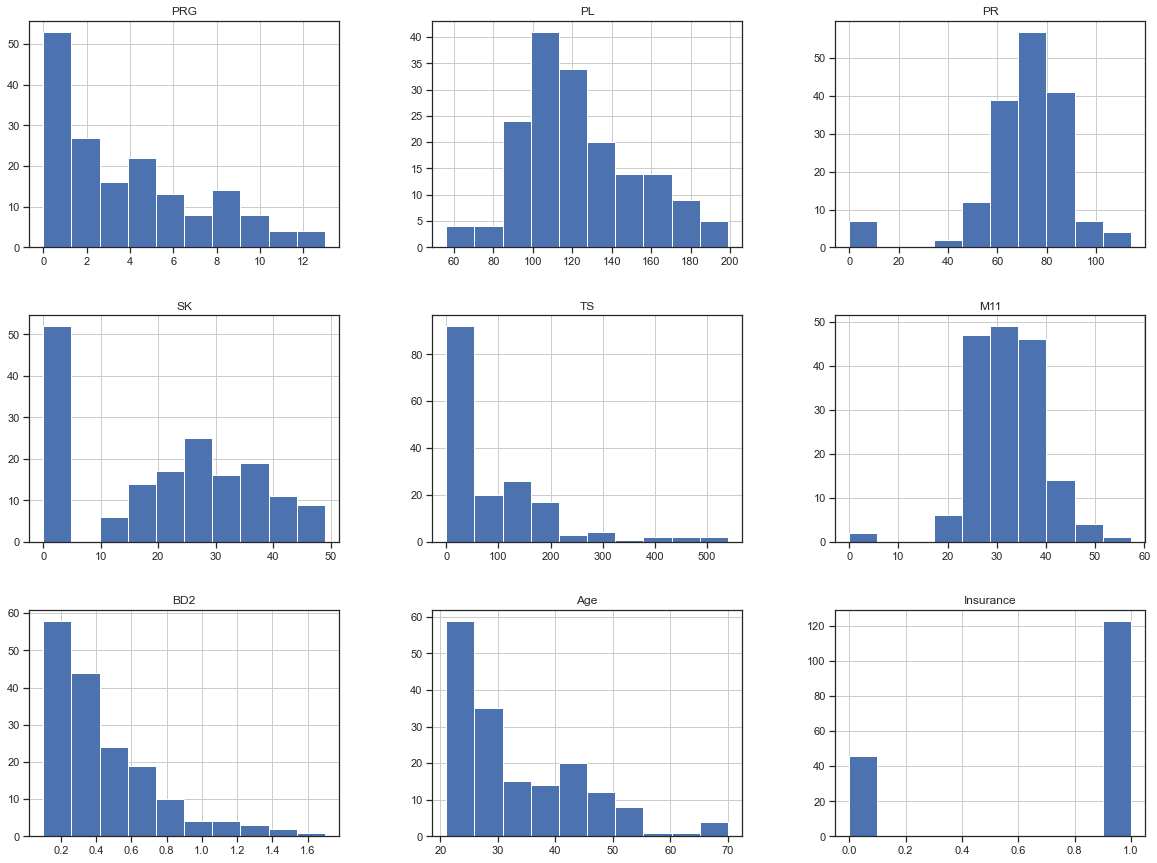

In [12]:
plt.rcParams['figure.figsize'] = [20, 15]
test_df.hist()
plt.show()

From the observation, we can classified the skewness of each column are :
 <ul>
 <li>Left skew :  `PRG`,`PL`, `Age` and `BD2` </li>
 <li>Normal distribution value: `SK`, `Mll`</li>
 <li>Right skew: `PR`</li>
 </ul>


# Domain knowledge

In order to process to the next step, the domain knowledge must be acquired :

* `PRG`: "under 100 mg/dL or 10 mg/L during fasting and less than 140 mg/dL or 14mg/L 2-hours postprandial". (Source : https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiL-YKX4ez2AhWWR2wGHbG9BWcQFnoECAsQAw&url=https%3A%2F%2Fwww.ncbi.nlm.nih.gov%2Fbooks%2FNBK541081%2F&usg=AOvVaw2sI5rNvznVcGMCoIK1hT8d)


* PL: Blood Work Result-1 (mu U/ml): According to [https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important] the normal platelet count ranges from 150 (mu U/ml) to 450 (mu U/ml)

* PR: Blood Pressure (mm Hg) According to [https://www.cdc.gov/bloodpressure/about.htm] The systolic blood pressure are classified into the following category:        <ul>
<li>Normal blood pressure : less than 120 (mmHg) </li>
<li>At risk of Prehypertension : from 120(mmHg) to 139(mmHg)</li>
<li>High blood pressure or Hypertension 140 (mmHg) or higher</li>
</ul>


* SK: Serum Potassium level: According to (https://www.ncbi.nlm.nih.gov/books/NBK307/), normal range for Serum Potassium is between (3.5 to 5.5 mmol/L



* TS: Transferrin Saturation (https://www.cdc.gov/bloodpressure/about.htm)


* M11: Body mass index (kg/m^2) [Source](https://www.cdc.gov/healthyweight/assessing/index.html)
<ul>
<li>Underweight: Body mass index less than 18.5</li>
<li> Normal: 18.5 to 24.9</li>
<li> Overweight: 25.0 to 29.9</li>
<li> Obese: 30.0 or higher</li>
</ul>

* BD2: Blood Work Result-4 (mu U/ml)

##Number of unique value

We can checkthe ID of patients to see if it's duplicate or not

### Train dataset

In [13]:
#Count the number of duplicate ID of train dataset
print(train_df['ID'].duplicated().sum())

0


### Test dataset

In [14]:
#Count the number of duplicate ID of test Dataset
print(test_df['ID'].duplicated().sum())

0


# Outlier

### Train dataset

<AxesSubplot:>

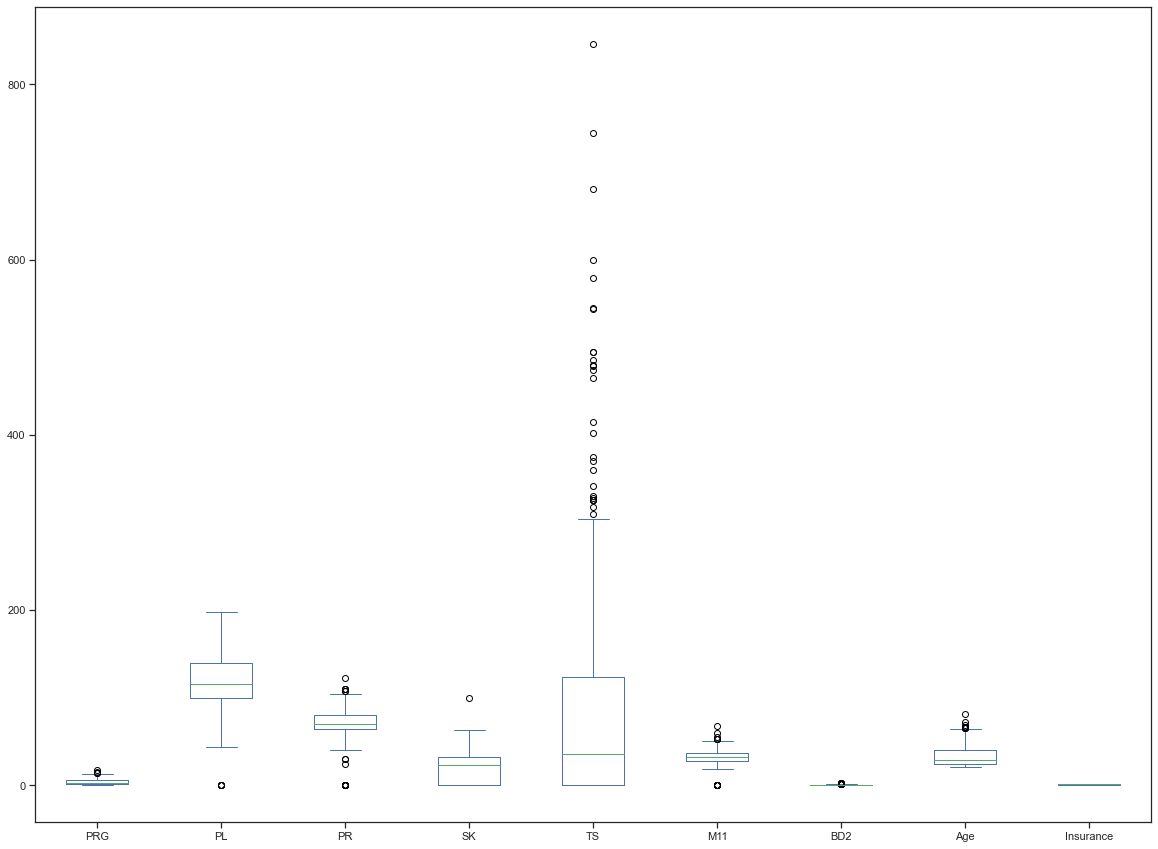

In [15]:
train_df.plot(kind ='box')

As can be observe from the box plot, except for the `Insurance`, `ID` ans `SEPSIS` collumn, according to the above mentioend box plot, the column that contains outliers are as follow:
* `PRG`
* `PL`
* `PR`
* `SK`
* `TS`
* `Mll`
* `BD2`
* `AGE`

## Correlation 

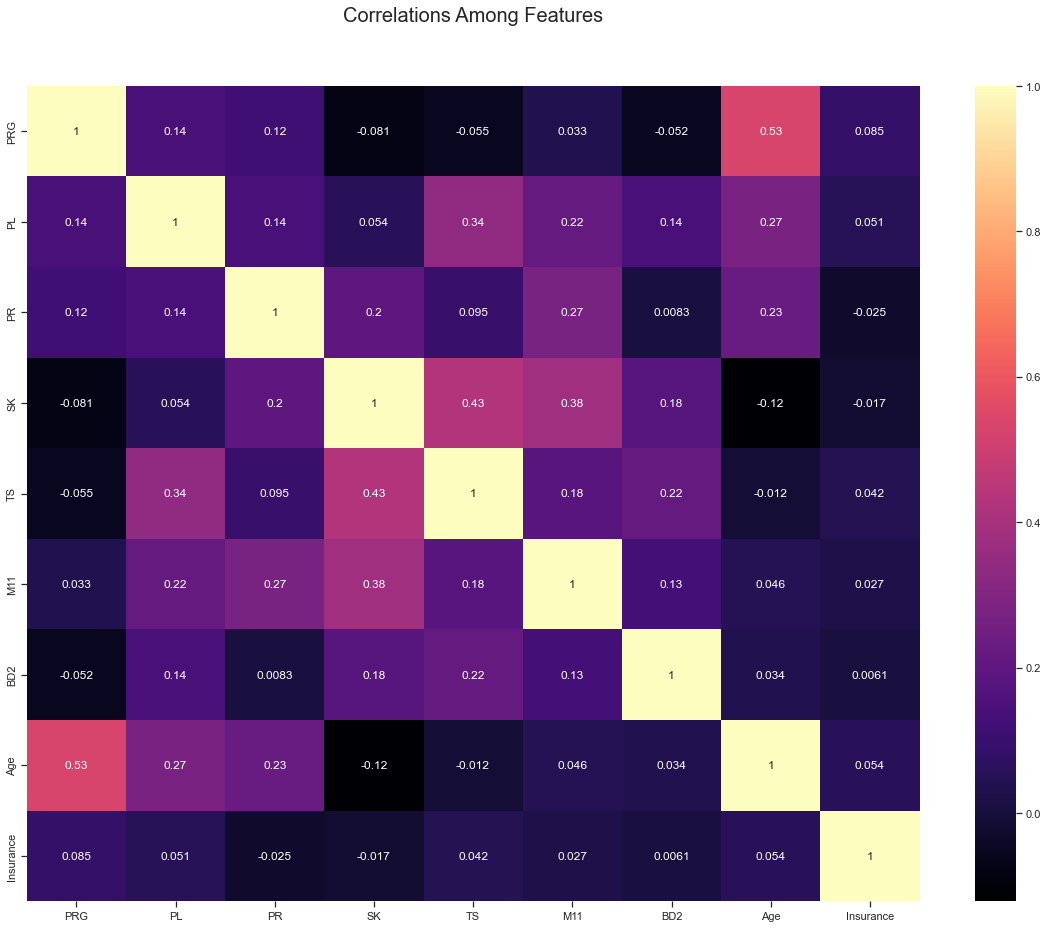

In [16]:
corr = train_df.corr(method = 'pearson')
sns.heatmap(data=corr, cmap='magma', annot = True)
plt.title("Correlations Among Features", y = 1.03, fontsize=20,pad=40)
plt.show()

The correlation is calculated using Pearson correlation methodology. Pearson Correlation range from +1 to -1. With +! is positive correlation and -1 is negative correlation. 
As can be observe from the heatmap, we can see that the correlated are: 
* To examine the correlation the Pearson correlation methode have been use. From the observation from the heat map, `Age` Feature is slightly correlated in a positive direction with the `PRG` feature.
+ `M11` Feature slightly positive correlate with `SK` value
+ `TS` feature is having a slight positve correlation with `SK`

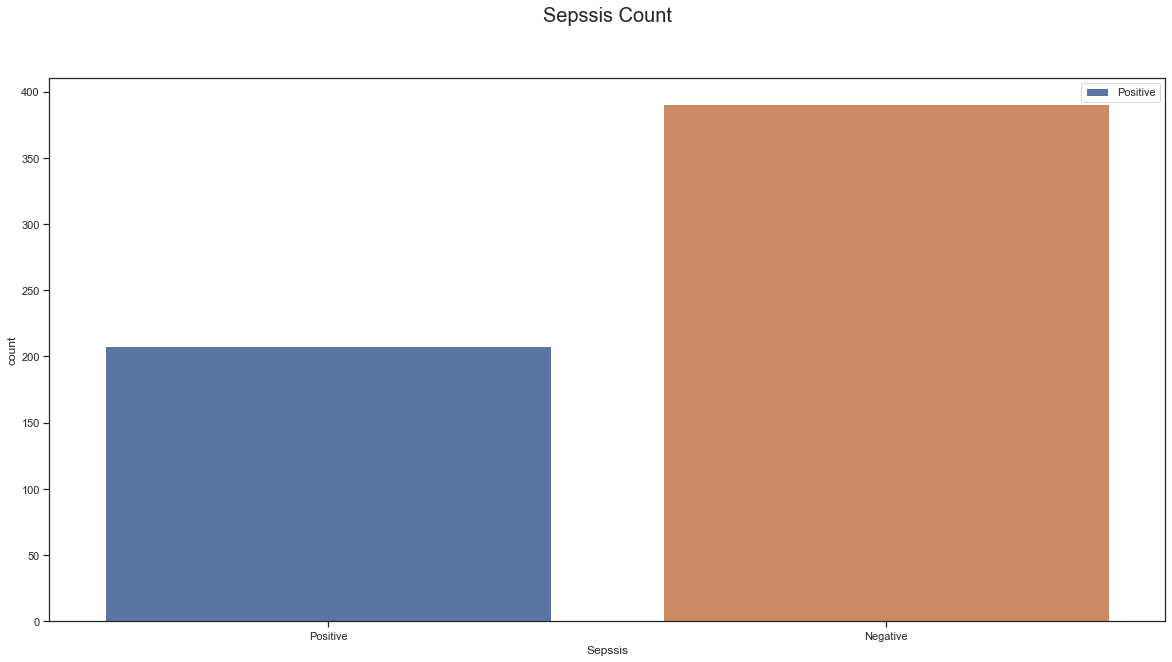

In [17]:
### Count number of category
plt.figure(figsize=(20,10))
sns.countplot(x='Sepssis', data= train_df)
plt.title("Sepssis Count", y = 1.03, fontsize=20,pad=40)
plt.legend(labels = ['Positive','Negative'])


As can be observe from the bar chart, around over 200 Patient listed in the 1 `train` dataset are Positive with `Sepsis`.


#### Age group of train dataset

Text(0.5, 1.03, 'Age Count Train')

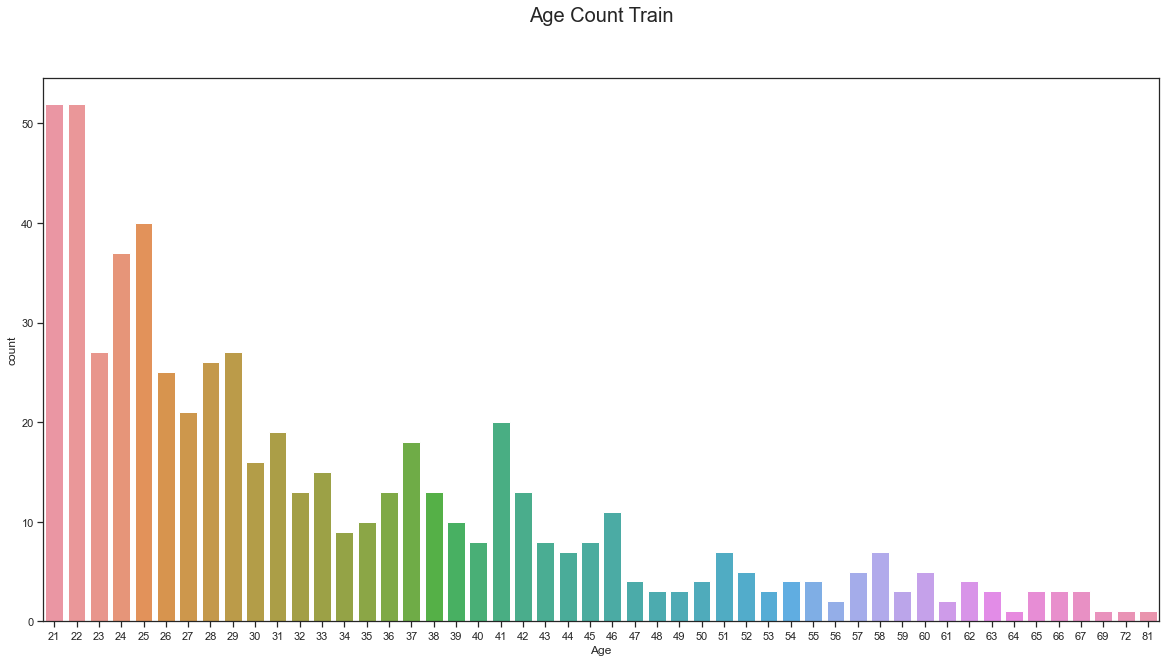

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(data = train_df, x= 'Age')
plt.title("Age Count Train", y = 1.03, fontsize=20,pad=40)

As can be observe the majority of patient are in theire early twenty, most of the patient range from 30 to 50 year olds and only a minority of people are over 60

<AxesSubplot:xlabel='Sepssis', ylabel='Age'>

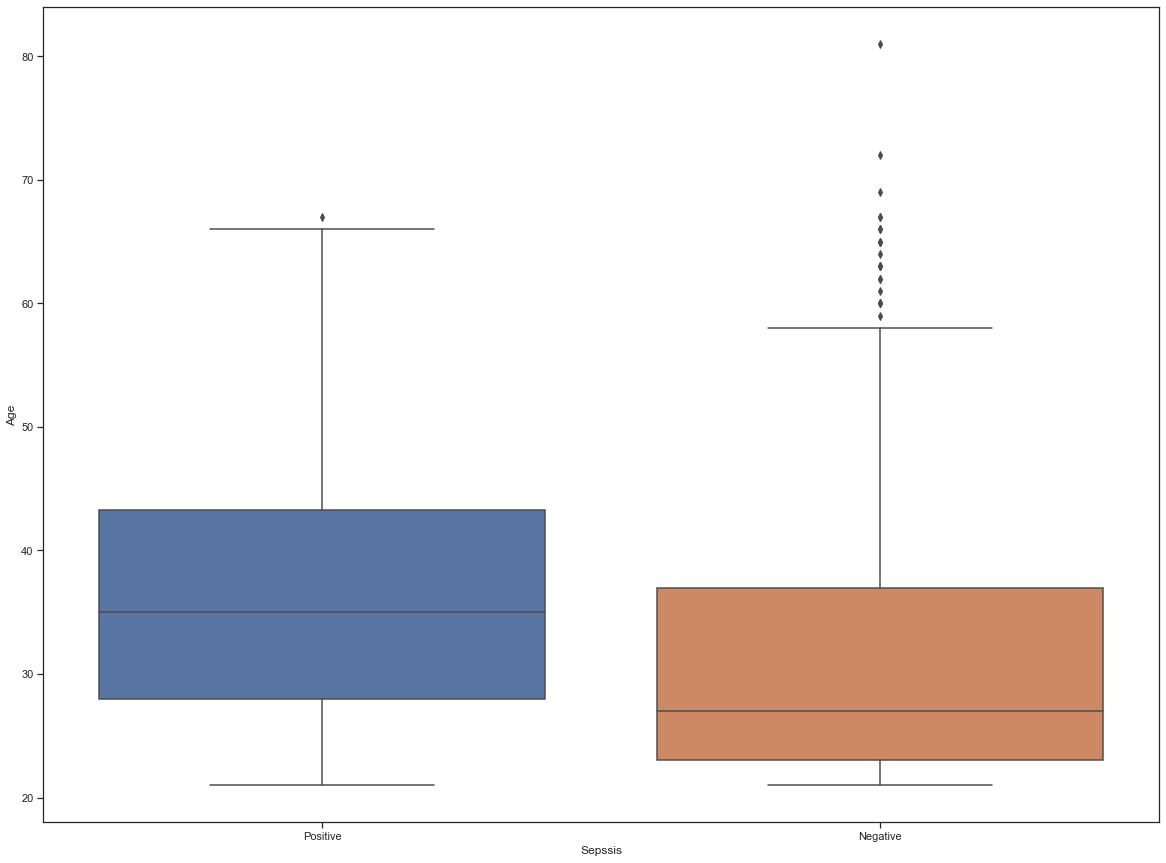

In [19]:
sns.boxplot(x='Sepssis', y = 'Age', data = train_df)

As can be observe, the higher the patient age the higher the chance that they are positive with `Sepsis`.

### Test Data frame 

<AxesSubplot:>

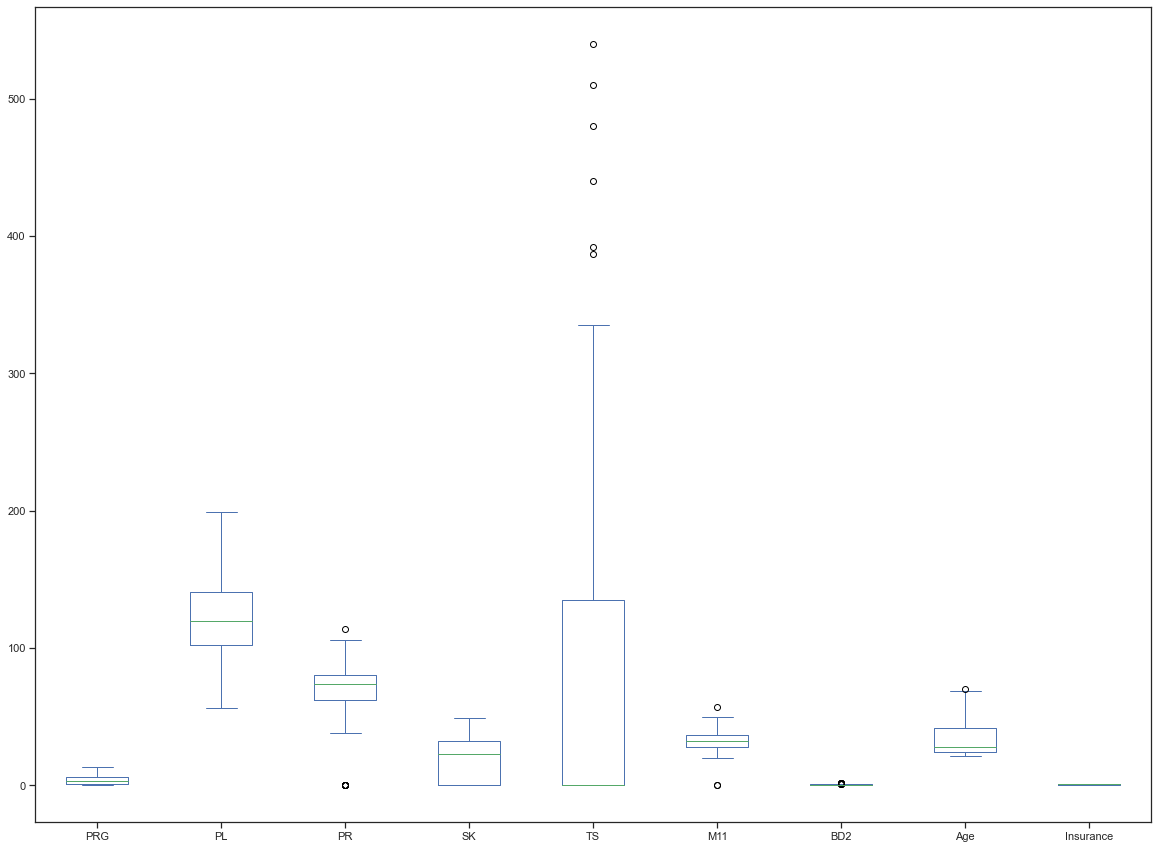

In [20]:
test_df.plot(kind='box')

## Correlation of test data


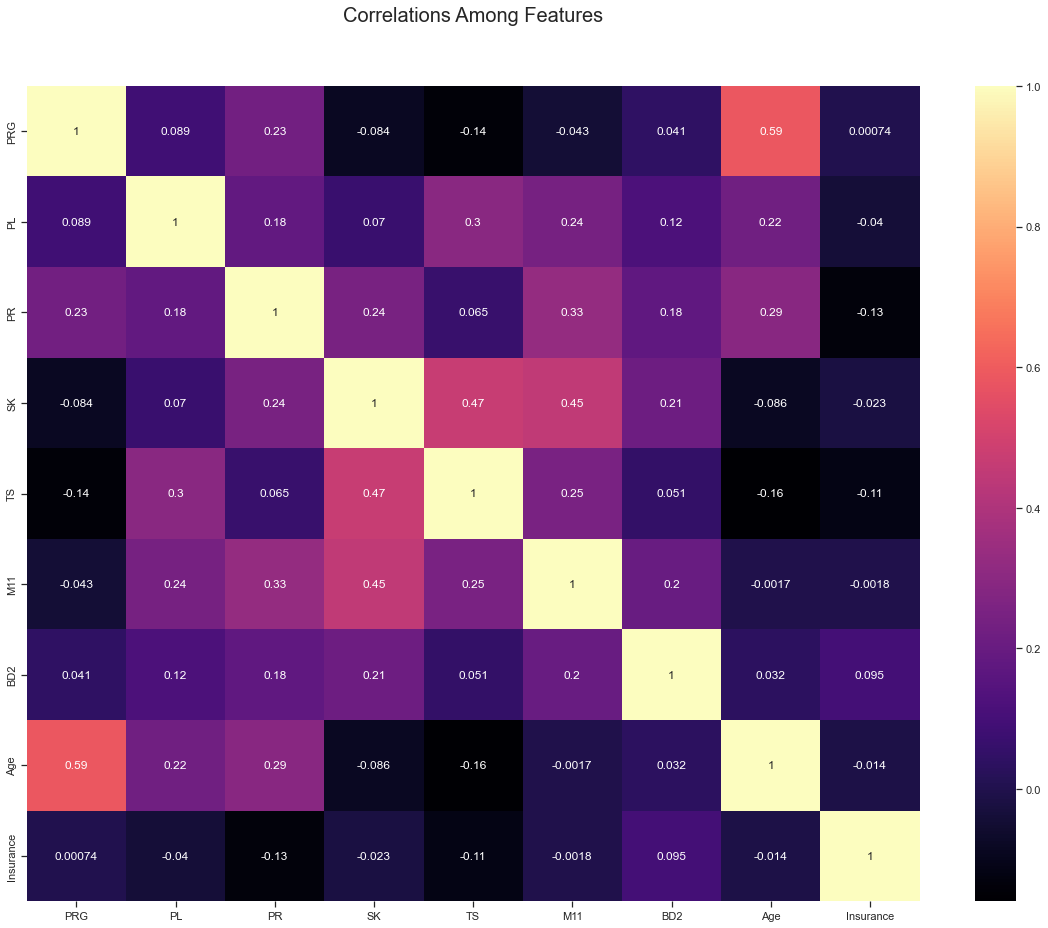

In [21]:
corr = test_df.corr(method = 'pearson')
sns.heatmap(data=corr, cmap='magma', annot = True)
plt.title("Correlations Among Features", y = 1.03, fontsize=20,pad=40)
plt.show()

Text(0.5, 1.03, 'Age Count Train')

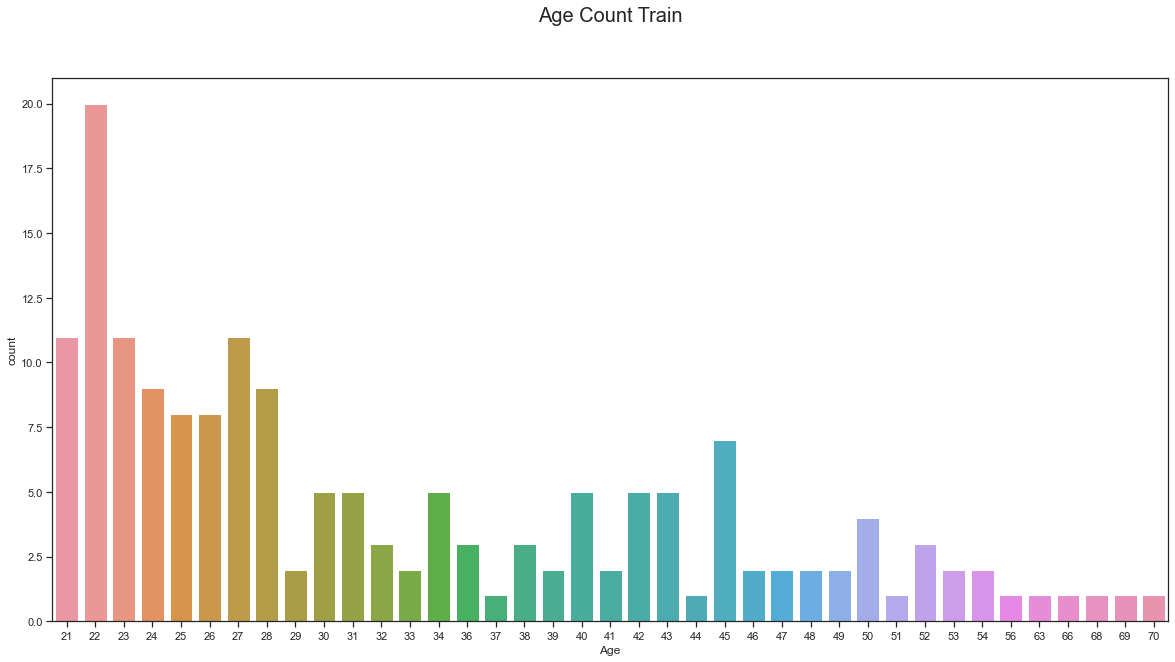

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(data = test_df, x= 'Age')
plt.title("Age Count Train", y = 1.03, fontsize=20,pad=40)
 

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.2.1"></a>
## 2.2.1 Drop column
***
In order to avoid data leakage, the requirement is to drop column `ID`.
The `Insurance` columns is also been drop since it is not related to patient's condition.

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


Remove inconsistent white space

In [24]:
def strip_whitespace(df):
  #Iterate throught the column field to find white space
  for features in df.columns:
    #The data type for this dataset is only object
    if (df[features].dtype == 'object'):
      df[features] = df[features].apply(lambda s:s.strip() )
  return df;
train_df = strip_whitespace(train_df)
test_df = strip_whitespace(test_df)

Check for duplication after remove whitespace

In [25]:
#Count the number of duplicate ID of train dataset
print("Number of duplicate patient of train dataset: ",train_df['ID'].duplicated().sum())

Number of duplicate patient of train dataset:  0


In [26]:
#Count the number of duplicate ID of train dataset
print("Number of duplicate patient of test dataset : ", test_df['ID'].duplicated().sum())

Number of duplicate patient of test dataset :  0


To makesure, drop dupplicate patients base on ID feature as each patients can only have one unique id

In [27]:
#De duplicate base on ID
train_df.drop_duplicates(subset=['ID'], inplace = True)
train_df.drop_duplicates(subset=['ID'], inplace = True)

Verify after deduplicate

In [28]:
#Count the number of duplicate ID of train dataset
print("Number of duplicate patient of train dataset",train_df['ID'].duplicated().sum())

Number of duplicate patient of train dataset 0


In [29]:
#Count the number of duplicate ID of train dataset
print("Number of duplicate patient of test dataset",test_df['ID'].duplicated().sum())

Number of duplicate patient of test dataset 0


## Due to the fact that the  `Sepssis` contains a typo, the column name is re adjust

In [30]:
train_df.rename(columns={"Sepssis": "Sepsis"}, inplace=True)

In [31]:
train_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


## Check for null value in the dataframe

In [32]:
def percentMissing(df) :
  percent_missing = df.isnull().sum() * 100 / len(df)
  print(percent_missing)

#As can be seen the dataset is clean and contains no null value which is greate
percentMissing(train_df)

ID           0.0
PRG          0.0
PL           0.0
PR           0.0
SK           0.0
TS           0.0
M11          0.0
BD2          0.0
Age          0.0
Insurance    0.0
Sepsis       0.0
dtype: float64


In [33]:
percentMissing(test_df)

ID           0.0
PRG          0.0
PL           0.0
PR           0.0
SK           0.0
TS           0.0
M11          0.0
BD2          0.0
Age          0.0
Insurance    0.0
dtype: float64


## Check zero

Due to the fact that the biochemical indicator of a patients cannot be zero (src)[], therefore the features that have a 0 as a value are identify as missing value

In [34]:
#The number of missing valu fills as 0 is
def countZeros(df,name_of_df) :
  print("---Number of zero value of " + name_of_df + "---")
  for column_name in df.columns:
      column = df[column_name]
      # Get the count of Zeros in column 
      count = (column == 0).sum()
      print(column_name, ': ', count)


In [35]:
#Count of train df
countZeros(test_df,"Train dataset")

---Number of zero value of Train dataset---
ID :  0
PRG :  18
PL :  0
PR :  7
SK :  52
TS :  85
M11 :  2
BD2 :  0
Age :  0
Insurance :  46


In [36]:
countZeros(test_df,"Test dataset")

---Number of zero value of Test dataset---
ID :  0
PRG :  18
PL :  0
PR :  7
SK :  52
TS :  85
M11 :  2
BD2 :  0
Age :  0
Insurance :  46


## Handle missing value

To handle missing value we impute the collumn with mean and median value except for `TS`, `PRG`, `M11` as we could build a linear regression model to handle missing value for these.

In [37]:
avoid_list = ['PRG', 'M11', 'TS']
def fill_zero_median(input_df,avoid_list) :
  df = input_df.copy() #Create a discreate copy of the dataframe
  for column in df.columns:
    if(((column in avoid_list) == False) and (df[column].dtype != "object")):
      print(column)
      df[column] = df[column].replace(0,df[column].median())

  return df
process_train_df = fill_zero_median(train_df,avoid_list)
process_test_df = fill_zero_median(test_df,avoid_list)

PL
PR
SK
BD2
Age
Insurance
PL
PR
SK
BD2
Age
Insurance


In [38]:
countZeros(process_train_df,"")

---Number of zero value of ---
ID :  0
PRG :  93
PL :  0
PR :  0
SK :  0
TS :  289
M11 :  9
BD2 :  0
Age :  0
Insurance :  0
Sepsis :  0


In [39]:
countZeros(process_test_df,"")

---Number of zero value of ---
ID :  0
PRG :  18
PL :  0
PR :  0
SK :  0
TS :  85
M11 :  2
BD2 :  0
Age :  0
Insurance :  0


Due to the fact that Sepsis column is a object string data type, it might contains mispelling as well as case inconsistancy. Therefore we need to convert all of the case in to lower case as well as checking for any typos 

## Drop Collumn

In [40]:
#Define a util function to drop columns for both data set
def dropCols (input_df, dropList) :
  input_df.drop(columns = dropList, inplace = True);
  return input_df

dropList=['ID', 'Insurance']
process_train_df = dropCols(process_train_df,dropList)
test_df = dropCols(test_df,dropList)

### Convert value in sepsis column to lowercase

Count the unique value of Sepsis column

In [41]:
print("Number of categorical column in the train datset ",process_train_df['Sepsis'].value_counts())

Number of categorical column in the train datset  Negative    391
Positive    208
Name: Sepsis, dtype: int64


In [42]:
process_train_df['Sepsis']= process_train_df['Sepsis'].map(lambda s:s.lower() if type(s) == str else s)

In [43]:
process_train_df.tail(10)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
589,0,73,70,23,0,21.1,0.342,25,negative
590,11,111,84,40,0,46.8,0.925,45,positive
591,2,112,78,50,140,39.4,0.175,24,negative
592,3,132,80,23,0,34.4,0.402,44,positive
593,2,82,52,22,115,28.5,1.699,25,negative
594,6,123,72,45,230,33.6,0.733,34,negative
595,0,188,82,14,185,32.0,0.682,22,positive
596,0,67,76,23,0,45.3,0.194,46,negative
597,1,89,24,19,25,27.8,0.559,21,negative
598,1,173,74,23,0,36.8,0.088,38,positive


### Correct typo in `Sepsis` column value

In [44]:
!pip install autocorrect
from autocorrect import spell

In [45]:
process_train_df["Sepsis"] = [' '.join([spell(i) for i in x.split()]) for x in train_df['Sepsis']]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

In [46]:
#Verifying the traininig data frame
process_train_df.head(5)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,6,148,72,35,0,33.6,0.627,50,Positive
1,1,85,66,29,0,26.6,0.351,31,Negative
2,8,183,64,23,0,23.3,0.672,32,Positive
3,1,89,66,23,94,28.1,0.167,21,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive


Verifying the dataset

In [47]:
train_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [48]:
test_df

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1,109,38,18,120,23.1,0.407,26
1,1,108,88,19,0,27.1,0.400,24
2,6,96,0,0,0,23.7,0.190,28
3,1,124,74,36,0,27.8,0.100,30
4,7,150,78,29,126,35.2,0.692,54
...,...,...,...,...,...,...,...,...
164,10,101,76,48,180,32.9,0.171,63
165,2,122,70,27,0,36.8,0.340,27
166,5,121,72,23,112,26.2,0.245,30
167,1,126,60,0,0,30.1,0.349,47


<a id="2.7.3"></a>
# 2.7.3 Outliers processing:
****

We need to do outlier processing for the train and test dataset

<AxesSubplot:>

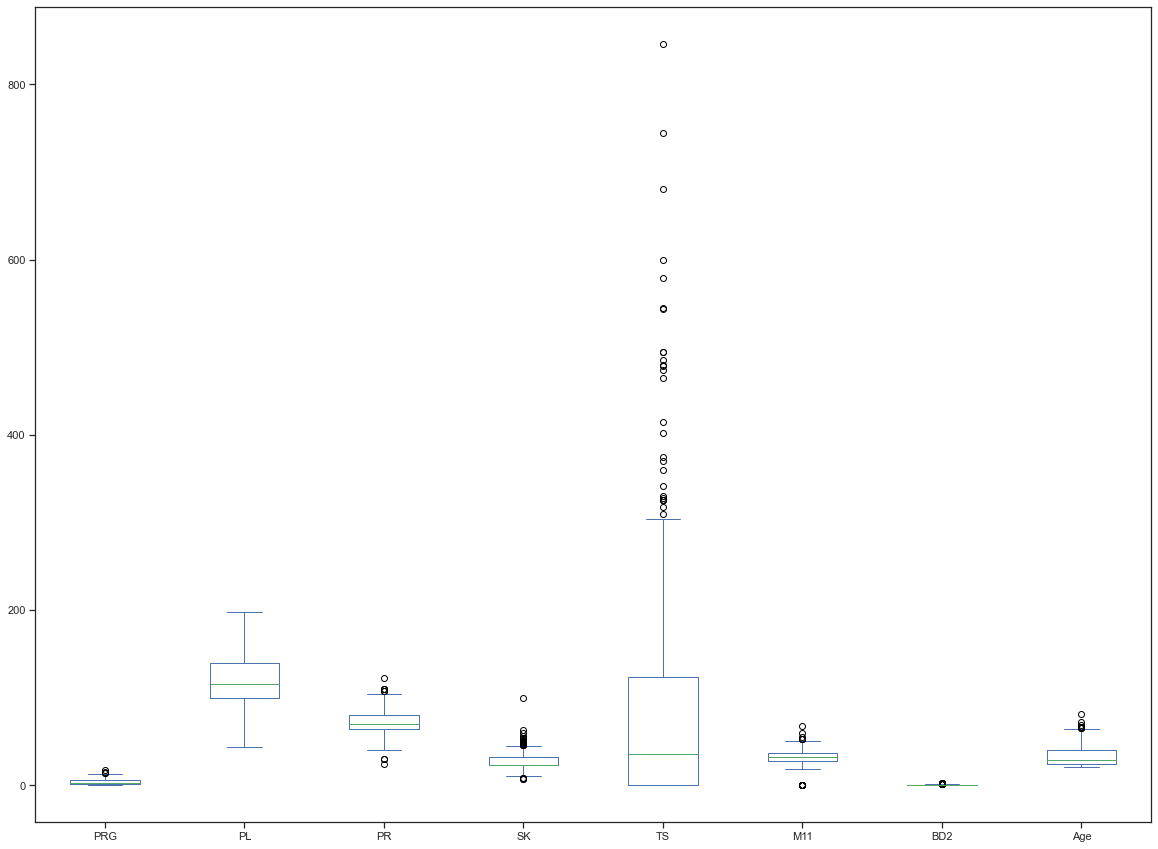

In [49]:
process_train_df.plot(kind="box")

In [50]:
def outlier_detection(df,col_name):
    q_low = df[col_name].quantile(0.02)
    q_high = df[col_name].quantile(0.93)
    print("----Outlier detection for column: ",col_name,"----")
    print("q_low: ", q_low)
    print("q_high", q_high)
    upper_outlier = set([])
    lower_outlier = set([])
    
    for i, x in enumerate(df[col_name]):
      if(x > q_high) :
        upper_outlier.add(x)
      if(x < q_low) :
        lower_outlier.add(x)
        
    if len(lower_outlier) > 0: 
      sorted(lower_outlier)
      
    print("Number of upper outlier: ",len(upper_outlier))
    print("----- Outlier value for: ", col_name,"-----")
    print("Upper value: ",sorted(upper_outlier))
    print("Lower value: ", lower_outlier)


A function to handle outlier

In [51]:
# A function to handle outlier and replace outliers with 0 value
def outlier_handler(df,col_name):
  q_low = df[col_name].quantile(0.02)
  q_high = df[col_name].quantile(0.93)
  df.loc[(df[col_name] > q_high) | (df[col_name] < q_low), col_name] = 0
  return df


In [52]:
def nanConverter(df):
    df.replace(0,np.nan, inplace = True)
    return df;

## `PRG` Column

In [53]:
outlier_detection(process_train_df,'PRG')

----Outlier detection for column:  PRG ----
q_low:  0.0
q_high 9.139999999999986
Number of upper outlier:  7
----- Outlier value for:  PRG -----
Upper value:  [10, 11, 12, 13, 14, 15, 17]
Lower value:  set()


In [54]:
process_train_df = outlier_handler(process_train_df,'PRG')

## `PL` column:

> **Train Dataset**

In [55]:
outlier_detection(process_train_df,'PL')

----Outlier detection for column:  PL ----
q_low:  72.96000000000001
q_high 177.14
Number of upper outlier:  18
----- Outlier value for:  PL -----
Upper value:  [178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 191, 193, 194, 195, 196, 197, 198]
Lower value:  {67, 68, 71, 72, 44, 57, 61, 62}


In [56]:
process_train_df = outlier_handler(process_train_df,'PL')

> **Test Dataset**

In [57]:
outlier_detection(test_df,'PL')

----Outlier detection for column:  PL ----
q_low:  72.32
q_high 174.0
Number of upper outlier:  8
----- Outlier value for:  PL -----
Upper value:  [175, 179, 181, 183, 187, 190, 195, 199]
Lower value:  {56, 65, 68}


In [58]:
process_test_df = outlier_handler(test_df,'PL')

## `PR` column:

> **Train Dataset**

In [59]:
outlier_detection(process_train_df,'PR')

----Outlier detection for column:  PR ----
q_low:  48.0
q_high 90.0
Number of upper outlier:  11
----- Outlier value for:  PR -----
Upper value:  [92, 94, 95, 96, 98, 100, 102, 104, 108, 110, 122]
Lower value:  {40, 44, 46, 24, 30}


> **Test Dataset**

In [60]:
outlier_detection(test_df,'PR')

----Outlier detection for column:  PR ----
q_low:  0.0
q_high 90.0
Number of upper outlier:  6
----- Outlier value for:  PR -----
Upper value:  [92, 94, 96, 100, 106, 114]
Lower value:  set()


## `SK` column:

> **Train Dataset**

In [61]:
outlier_detection(process_train_df,'SK')

----Outlier detection for column:  SK ----
q_low:  11.0
q_high 42.0
Number of upper outlier:  15
----- Outlier value for:  SK -----
Upper value:  [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99]
Lower value:  {8, 10, 7}


In [62]:
process_test_df = outlier_handler(test_df,'SK')

> **Test Dataset**

In [63]:
outlier_detection(process_test_df,'SK')

----Outlier detection for column:  SK ----
q_low:  0.0
q_high 39.0
Number of upper outlier:  3
----- Outlier value for:  SK -----
Upper value:  [40, 41, 42]
Lower value:  set()


In [64]:
process_test_df = outlier_handler(process_test_df,'SK')

## `TS` column:


> **Sample train Dataset**

In [65]:
outlier_detection(process_train_df,'TS')

----Outlier detection for column:  TS ----
q_low:  0.0
q_high 258.9799999999999
Number of upper outlier:  38
----- Outlier value for:  TS -----
Upper value:  [265, 270, 271, 274, 275, 277, 278, 280, 284, 285, 293, 300, 304, 310, 318, 325, 326, 328, 330, 342, 360, 370, 375, 402, 415, 465, 474, 478, 480, 485, 495, 543, 545, 579, 600, 680, 744, 846]
Lower value:  set()


> **Sample test Dataset**

In [66]:
outlier_detection(process_test_df,'TS')

----Outlier detection for column:  TS ----
q_low:  0.0
q_high 246.00000000000023
Number of upper outlier:  12
----- Outlier value for:  TS -----
Upper value:  [265, 272, 291, 293, 321, 335, 387, 392, 440, 480, 510, 540]
Lower value:  set()


In [67]:
process_test_df = outlier_handler(process_test_df,'TS')

## `M11` column:

> **Sample train Dataset**

In [68]:
outlier_detection(process_train_df,'M11')

----Outlier detection for column:  M11 ----
q_low:  18.392
q_high 43.3
Number of upper outlier:  30
----- Outlier value for:  M11 -----
Upper value:  [43.4, 43.5, 43.6, 44.0, 44.1, 44.2, 45.0, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 46.1, 46.2, 46.5, 46.7, 46.8, 47.9, 48.3, 48.8, 49.7, 50.0, 52.3, 52.9, 53.2, 55.0, 59.4, 67.1]
Lower value:  {0.0, 18.2}


In [69]:
process_train_df = outlier_handler(process_train_df,'M11')

> **Sample test Dataset**

In [70]:
outlier_detection(process_test_df,'M11')

----Outlier detection for column:  M11 ----
q_low:  19.716
q_high 42.444
Number of upper outlier:  11
----- Outlier value for:  M11 -----
Upper value:  [42.9, 43.3, 43.5, 44.0, 44.5, 44.6, 46.1, 46.3, 49.3, 49.6, 57.3]
Lower value:  {0.0, 19.5}


In [71]:
process_test_df = outlier_handler(process_test_df,'M11')

## `BD2` column:

> **Sample train Dataset**

In [72]:
outlier_detection(process_train_df,'BD2')

----Outlier detection for column:  BD2 ----
q_low:  0.10796
q_high 0.968
Number of upper outlier:  40
----- Outlier value for:  BD2 -----
Upper value:  [0.997, 1.001, 1.021, 1.022, 1.034, 1.072, 1.076, 1.095, 1.101, 1.114, 1.127, 1.136, 1.138, 1.144, 1.154, 1.159, 1.189, 1.191, 1.213, 1.222, 1.224, 1.251, 1.268, 1.318, 1.321, 1.353, 1.39, 1.391, 1.4, 1.441, 1.476, 1.6, 1.699, 1.731, 1.781, 1.893, 2.137, 2.288, 2.329, 2.42]
Lower value:  {0.102, 0.088, 0.085, 0.084, 0.096, 0.101, 0.089, 0.092, 0.078, 0.107}


In [73]:
process_train_df = outlier_handler(process_train_df,'BD2')

> **Sample test Dataset**

In [74]:
outlier_detection(test_df,'BD2')

----Outlier detection for column:  BD2 ----
q_low:  0.12315999999999999
q_high 0.9206000000000006
Number of upper outlier:  12
----- Outlier value for:  BD2 -----
Upper value:  [0.97, 1.057, 1.096, 1.162, 1.174, 1.182, 1.258, 1.282, 1.292, 1.394, 1.461, 1.698]
Lower value:  {0.1, 0.118, 0.115, 0.121}


In [75]:
process_test_df = outlier_handler(process_test_df,'BD2')

## Use interpolation to handle outlier value

> **Train Dataset**

In [76]:
percentMissing(process_train_df)

PRG       0.0
PL        0.0
PR        0.0
SK        0.0
TS        0.0
M11       0.0
BD2       0.0
Age       0.0
Sepsis    0.0
dtype: float64


In [77]:
countZeros(process_train_df,"")

---Number of zero value of ---
PRG :  135
PL :  54
PR :  0
SK :  0
TS :  289
M11 :  52
BD2 :  53
Age :  0
Sepsis :  0


In [78]:
process_train_df = nanConverter(process_train_df)

In [79]:
process_train_df = process_train_df.interpolate()

In [80]:
process_train_df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,6.000000,148.000000,72,35,NaN,33.6,0.627,50,Positive
1,1.000000,85.000000,66,29,NaN,26.6,0.351,31,Negative
2,8.000000,87.000000,64,23,NaN,23.3,0.672,32,Positive
3,1.000000,89.000000,66,23,94.0,28.1,0.167,21,Negative
4,3.000000,137.000000,40,35,168.0,43.1,0.184,33,Positive
...,...,...,...,...,...,...,...,...,...
594,6.000000,123.000000,72,45,230.0,33.6,0.733,34,Negative
595,4.333333,111.666667,82,14,185.0,32.0,0.682,22,Positive
596,2.666667,100.333333,76,23,105.0,29.9,0.194,46,Negative
597,1.000000,89.000000,24,19,25.0,27.8,0.559,21,Negative


Text(0.5, 1.0, 'Outlier before process')

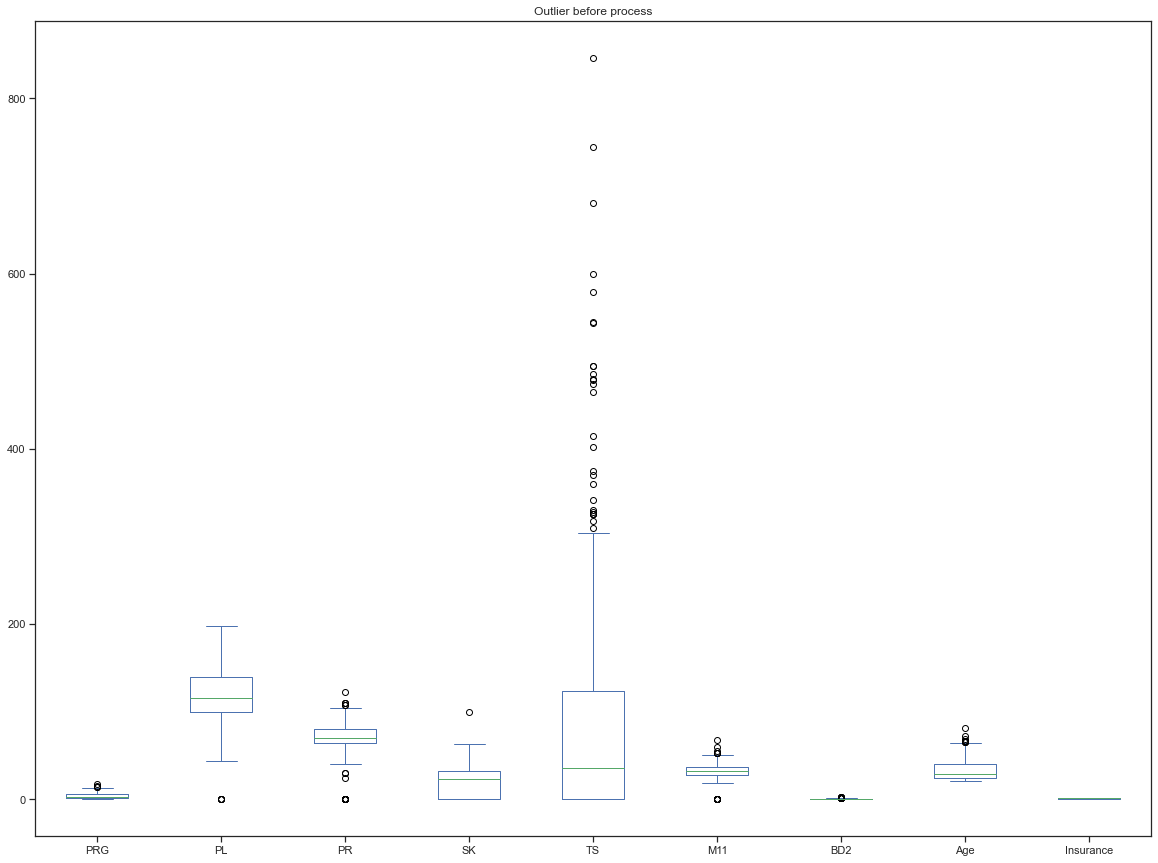

In [81]:
train_df.plot(kind='box')
plt.title("Outlier before process")

However after doing some interpolation we still have some Nan value.

In [82]:
countZeros(process_train_df,"Train dataset")

---Number of zero value of Train dataset---
PRG :  0
PL :  0
PR :  0
SK :  0
TS :  0
M11 :  0
BD2 :  0
Age :  0
Sepsis :  0


In [83]:
percentMissing(process_train_df)

PRG       0.000000
PL        0.000000
PR        0.000000
SK        0.000000
TS        0.500835
M11       0.000000
BD2       0.000000
Age       0.000000
Sepsis    0.000000
dtype: float64


In [84]:
process_train_df = process_train_df.dropna()

In [85]:
percentMissing(process_train_df)

PRG       0.0
PL        0.0
PR        0.0
SK        0.0
TS        0.0
M11       0.0
BD2       0.0
Age       0.0
Sepsis    0.0
dtype: float64


Compare original train DF to the process_train df

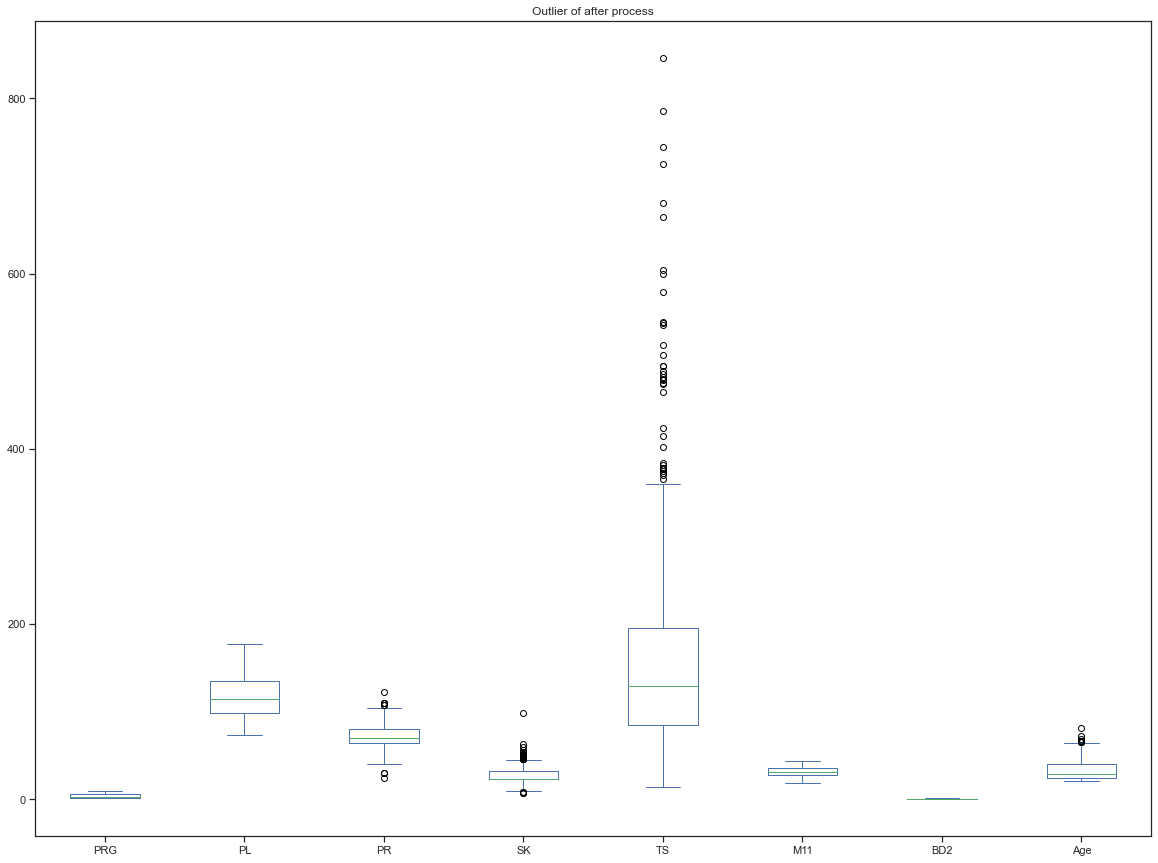

In [86]:
process_train_df.plot(kind='box')
plt.title('Outlier of after process')
plt.show()

As can be observe from the box plot, we only need to resolve the outlier for `PR` , `SK`, `TS` and `Age`

We could resolve the outlier by filling it with median value

In [87]:
#Fill outlier with median value
def fill_median(input_df,fill_list):
  df = input_df.copy()
  for col_name in fill_list:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df[col_name]= df[col_name].loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df

`PR`

In [88]:
outlier_detection(process_train_df, 'PR')

----Outlier detection for column:  PR ----
q_low:  48.0
q_high 90.0
Number of upper outlier:  11
----- Outlier value for:  PR -----
Upper value:  [92, 94, 95, 96, 98, 100, 102, 104, 108, 110, 122]
Lower value:  {40, 44, 46, 24, 30}


`SK`

In [89]:
outlier_detection(process_train_df, 'SK')

----Outlier detection for column:  SK ----
q_low:  11.0
q_high 42.0
Number of upper outlier:  15
----- Outlier value for:  SK -----
Upper value:  [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99]
Lower value:  {8, 10, 7}


## `TS`

In [90]:
outlier_detection(process_train_df, 'TS')

----Outlier detection for column:  TS ----
q_low:  36.9
q_high 334.2000000000003
Number of upper outlier:  41
----- Outlier value for:  TS -----
Upper value:  [342.0, 345.75, 354.66666666666663, 356.0, 358.66666666666663, 360.0, 365.0, 370.0, 372.0, 375.0, 377.0, 377.5, 378.0, 382.0, 384.25, 402.0, 415.0, 423.75, 465.0, 474.0, 475.5, 478.0, 480.0, 482.5, 485.0, 489.0, 495.0, 506.6666666666667, 518.0, 541.25, 543.0, 545.0, 579.0, 600.0, 603.6, 664.2, 680.0, 724.8, 744.0, 785.4, 846.0]
Lower value:  {32.0, 36.0, 14.0, 18.0, 23.0, 25.0, 29.0}


### `Age`
After closer examination, the age value of the dataset is within the limit of normal age, therefore we elave it alone


In [91]:
outlier_detection(process_train_df, 'Age')

----Outlier detection for column:  Age ----
q_low:  21.0
q_high 56.35000000000002
Number of upper outlier:  14
----- Outlier value for:  Age -----
Upper value:  [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 72, 81]
Lower value:  set()


Filling outlier with median value

In [92]:
processed_train_df = fill_median(process_train_df,['PR','SK','TS'])

<AxesSubplot:>

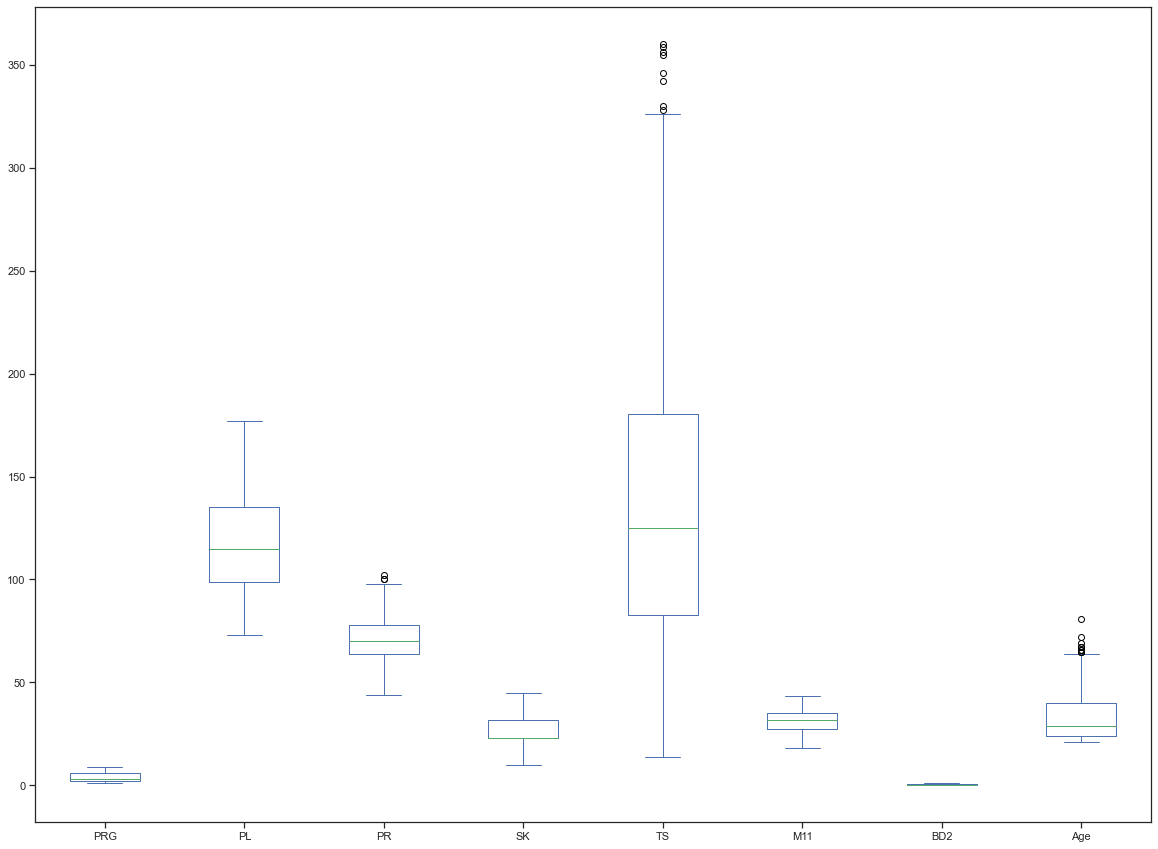

In [93]:
processed_train_df.plot(kind='box')

After filling the outlier with median value, we still have PR and TS collumn are outlier

`PR`

In [94]:
outlier_detection(processed_train_df,'PR')

----Outlier detection for column:  PR ----
q_low:  50.0
q_high 88.0
Number of upper outlier:  8
----- Outlier value for:  PR -----
Upper value:  [90.0, 92.0, 94.0, 95.0, 96.0, 98.0, 100.0, 102.0]
Lower value:  {48.0, 44.0, 46.0}


As can observe, the outlier are fall in normal case of our domain knowledge therefore we decide to keep it as is

`TS`

In [95]:
outlier_detection(processed_train_df,'TS')

----Outlier detection for column:  TS ----
q_low:  36.18
q_high 269.91333333333336
Number of upper outlier:  37
----- Outlier value for:  TS -----
Upper value:  [270.0, 271.0, 272.3333333333333, 274.0, 275.0, 277.0, 278.0, 280.0, 284.0, 285.0, 286.0, 287.25, 293.0, 294.5, 300.0, 301.0, 304.0, 305.5, 306.25, 309.0, 310.0, 315.25, 315.5, 316.5, 317.0, 318.0, 323.0, 325.0, 326.0, 328.0, 330.0, 342.0, 345.75, 354.66666666666663, 356.0, 358.66666666666663, 360.0]
Lower value:  {32.0, 36.0, 14.0, 18.0, 23.0, 25.0, 29.0}


We need to drop outliers of `TS` collumn

In [96]:

def drop_numerical_outliers(df, z_thresh=3, cols=None):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |
              (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    df = df.dropna()
    return df

for i in range(3):
    processed_train_df = drop_numerical_outliers(
    processed_train_df, cols=['TS','SK','PR'])


<AxesSubplot:>

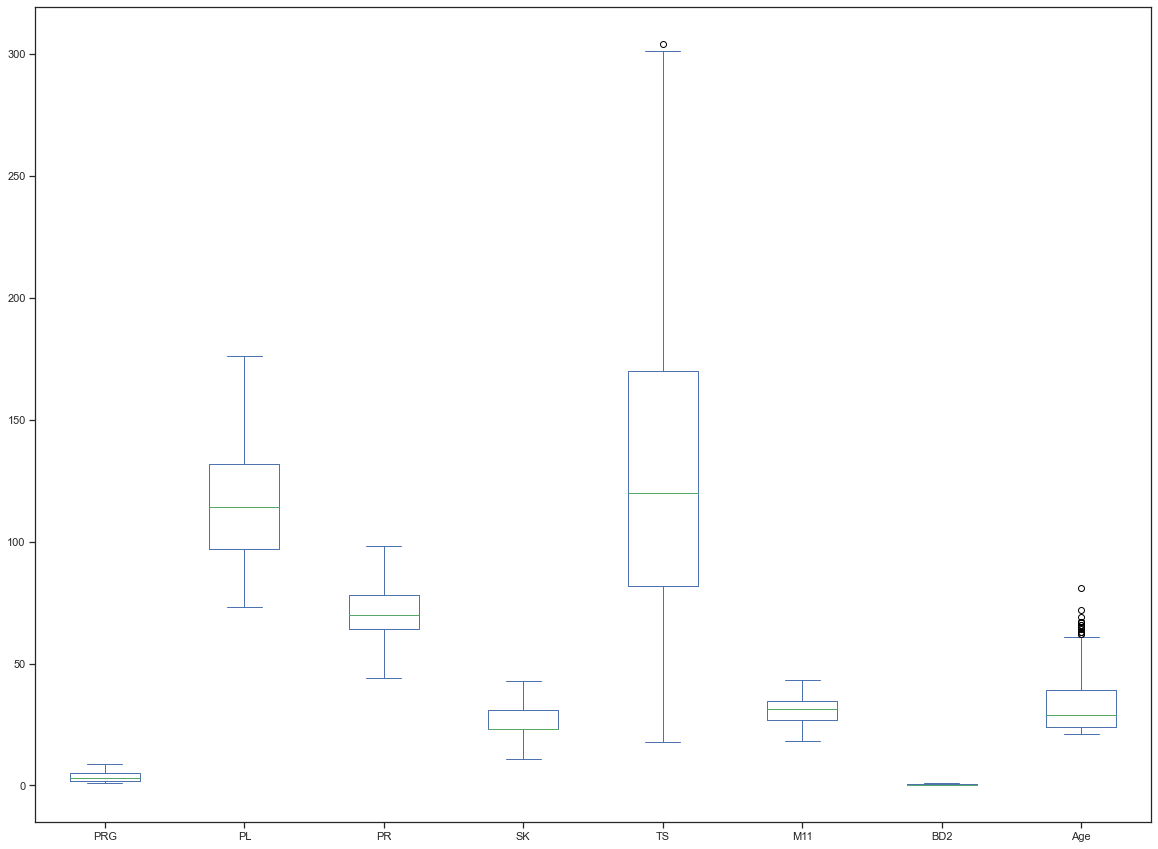

In [97]:
#Box plot for processed_train_df
processed_train_df.plot(kind='box')

We still have outlier `Age` colunn

`Age`

In [98]:
outlier_detection(process_train_df,'Age')

----Outlier detection for column:  Age ----
q_low:  21.0
q_high 56.35000000000002
Number of upper outlier:  14
----- Outlier value for:  Age -----
Upper value:  [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 72, 81]
Lower value:  set()


As can be obeserve, the age is within normal age range, therefore wwe

<a id="2.2.3"></a>
## 2.2.3 Convert `Sepsis` in to binary number
***
Since `Sepssis` just have the `Positive` and `Negative` values so I want to convert them to 0 for Negative and 1 is for Positive

In [99]:
binarysepsis_train_df = pd.get_dummies(process_train_df["Sepsis"])
binarysepsis_train_df

,Negative,Positive
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
...,...,...
594,1,0
595,0,1
596,1,0
597,1,0


With the function get dummise the categrical colum `sepsis` which contains `positive` or `negative` of its value have been transfer into a binary value of two new column `Negative` and `Positve` of the `binarysepsis_train_df`. Now we need to merget the positive column back into the `train_df` data frame.

In [100]:
process_train_df = pd.concat((binarysepsis_train_df, process_train_df), axis=1)

In [101]:
process_train_df

,Negative,Positive,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
3,1,0,1.000000,89.000000,66,23,94.0,28.1,0.167,21,Negative
4,0,1,3.000000,137.000000,40,35,168.0,43.1,0.184,33,Positive
5,1,0,5.000000,116.000000,74,23,128.0,25.6,0.201,30,Negative
6,0,1,3.000000,78.000000,50,32,88.0,31.0,0.248,26,Positive
7,1,0,2.500000,115.000000,70,23,315.5,35.3,0.134,29,Negative
...,...,...,...,...,...,...,...,...,...,...,...
594,1,0,6.000000,123.000000,72,45,230.0,33.6,0.733,34,Negative
595,0,1,4.333333,111.666667,82,14,185.0,32.0,0.682,22,Positive
596,1,0,2.666667,100.333333,76,23,105.0,29.9,0.194,46,Negative
597,1,0,1.000000,89.000000,24,19,25.0,27.8,0.559,21,Negative


After concatination of the two dataset, we conventionalize the result for the `Sepsis` column are as follow :
<ul>
  <li> 1 : Positive
  <li> 0 : Negative
</ul>
therefore we drop the negative and Sepsis column and rename the Positive column to Sepsis

In [102]:
dropList = ["Negative","Sepsis"]
#Drop column
process_train_df = dropCols(process_train_df,dropList)
#Rename Positive column to Sepsis
process_train_df = process_train_df.rename(columns={"Positive":"Sepsis"})

In [103]:
#Verifying the train_df
processed_train_df.head(5)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,Negative
5,5.0,116.0,74.0,23.0,128.0,25.6,0.201,30,Negative
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,Positive
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,Positive
15,7.0,100.0,70.0,23.0,202.5,30.0,0.484,32,Positive


In [104]:
processed_train_df.tail(5)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
592,3.000000,132.000000,80.0,23.0,127.5,34.4,0.4020,44,Positive
593,2.000000,82.000000,52.0,22.0,115.0,28.5,0.5675,25,Negative
595,4.333333,111.666667,82.0,14.0,185.0,32.0,0.6820,22,Positive
596,2.666667,100.333333,76.0,23.0,105.0,29.9,0.1940,46,Negative
598,1.000000,173.000000,74.0,23.0,25.0,36.8,0.5590,38,Positive


As can be seen the sepsis have been convert from the categorical data to a binary integer

In [105]:
processed_train_df.dtypes

PRG       float64
PL        float64
PR        float64
SK        float64
TS        float64
M11       float64
BD2       float64
Age         int64
Sepsis     object
dtype: object

## For test dataset

In [106]:
percentMissing(process_test_df)

PRG    0.0
PL     0.0
PR     0.0
SK     0.0
TS     0.0
M11    0.0
BD2    0.0
Age    0.0
dtype: float64


In [107]:
countZeros(process_test_df,"Test dataset")

---Number of zero value of Test dataset---
PRG :  18
PL :  15
PR :  7
SK :  72
TS :  97
M11 :  16
BD2 :  16
Age :  0


In [108]:
test_df

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1,109,38,18,120,23.1,0.407,26
1,1,108,88,19,0,27.1,0.400,24
2,6,96,0,0,0,23.7,0.190,28
3,1,124,74,36,0,27.8,0.000,30
4,7,150,78,29,126,35.2,0.692,54
...,...,...,...,...,...,...,...,...
164,10,101,76,0,180,32.9,0.171,63
165,2,122,70,27,0,36.8,0.340,27
166,5,121,72,23,112,26.2,0.245,30
167,1,126,60,0,0,30.1,0.349,47


In [109]:
process_test_df = nanConverter(process_test_df)

In [110]:
process_test_df = process_test_df.interpolate()

Text(0.5, 1.0, 'After interpolation Test')

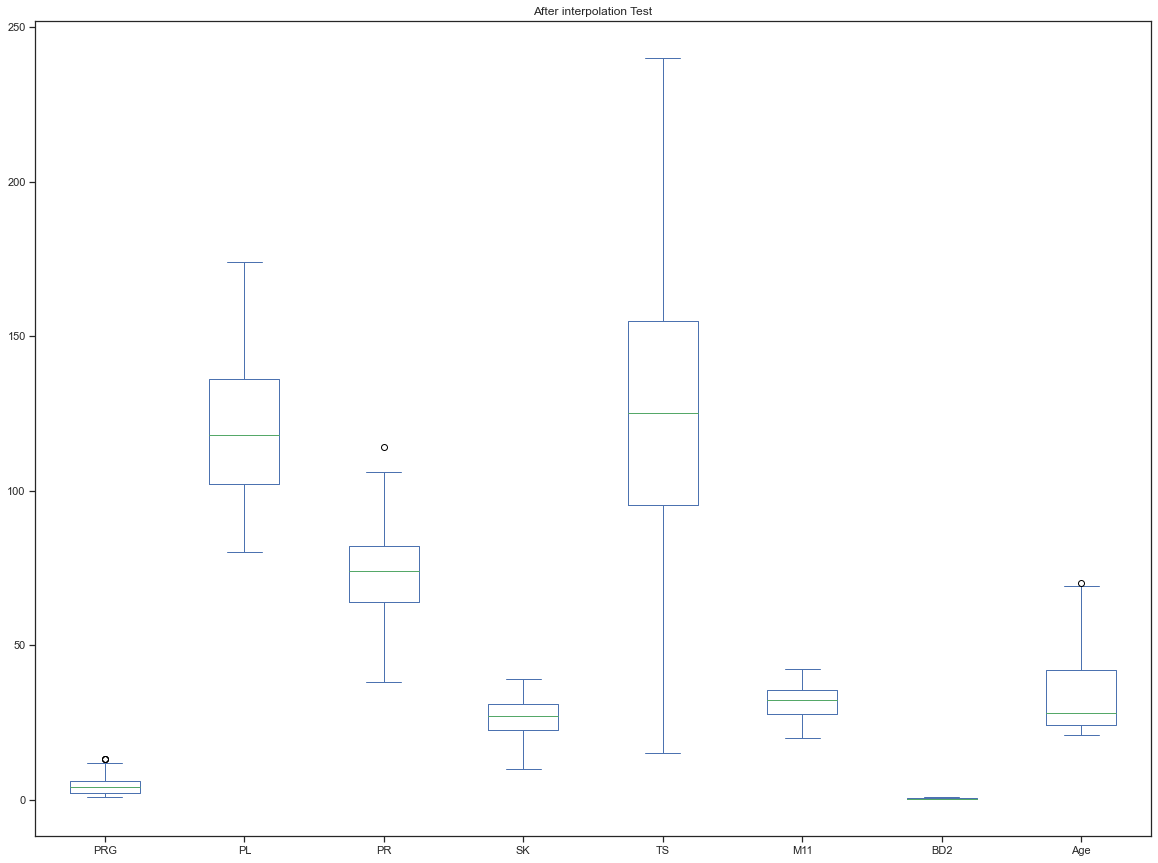

In [111]:
process_test_df.plot(kind = 'box')
plt.title('After interpolation Test')

However after done interpolation we have some missing value

In [112]:
countZeros(process_test_df,"Test dataset")

---Number of zero value of Test dataset---
PRG :  0
PL :  0
PR :  0
SK :  0
TS :  0
M11 :  0
BD2 :  0
Age :  0


In [113]:
percentMissing(process_test_df)

PRG    0.0
PL     0.0
PR     0.0
SK     0.0
TS     0.0
M11    0.0
BD2    0.0
Age    0.0
dtype: float64


In [114]:
process_test_df.fillna(process_test_df.median)

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1.0,109.0,38.0,18.000000,120.0,23.1,0.407,26
1,1.0,108.0,88.0,19.000000,121.5,27.1,0.400,24
2,6.0,96.0,81.0,27.500000,123.0,23.7,0.190,28
3,1.0,124.0,74.0,36.000000,124.5,27.8,0.441,30
4,7.0,150.0,78.0,29.000000,126.0,35.2,0.692,54
...,...,...,...,...,...,...,...,...
164,10.0,101.0,76.0,28.333333,180.0,32.9,0.171,63
165,2.0,122.0,70.0,27.000000,146.0,36.8,0.340,27
166,5.0,121.0,72.0,23.000000,112.0,26.2,0.245,30
167,1.0,126.0,60.0,27.000000,112.0,30.1,0.349,47


Verify once more

In [115]:
process_test_df.dropna(inplace = True)

In [116]:
percentMissing(process_test_df)

PRG    0.0
PL     0.0
PR     0.0
SK     0.0
TS     0.0
M11    0.0
BD2    0.0
Age    0.0
dtype: float64


In [117]:
process_test_df = fill_median(process_test_df,['PRG','PR'])

<AxesSubplot:>

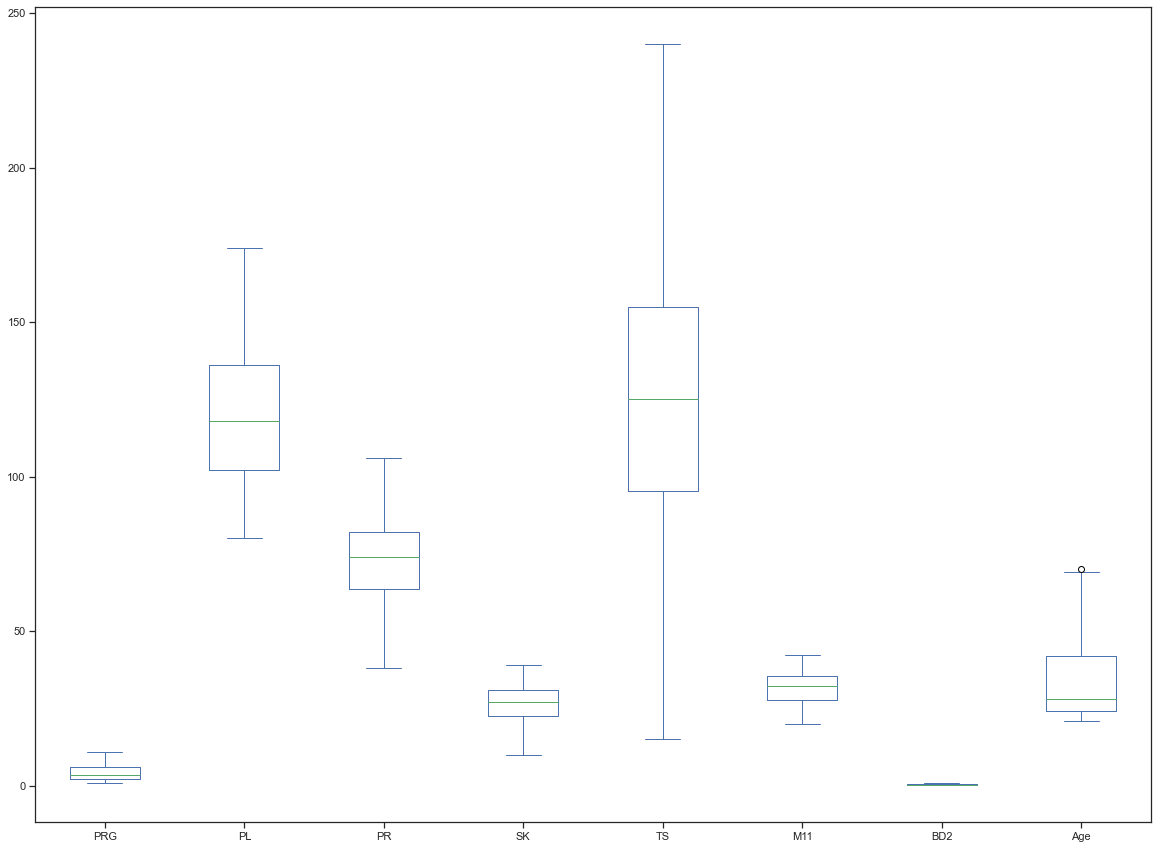

In [118]:
process_test_df.plot(kind = 'box')

### Final dataset :

`Train dataset`

In [119]:
process_train_df

,Sepsis,PRG,PL,PR,SK,TS,M11,BD2,Age
3,0,1.000000,89.000000,66,23,94.0,28.1,0.167,21
4,1,3.000000,137.000000,40,35,168.0,43.1,0.184,33
5,0,5.000000,116.000000,74,23,128.0,25.6,0.201,30
6,1,3.000000,78.000000,50,32,88.0,31.0,0.248,26
7,0,2.500000,115.000000,70,23,315.5,35.3,0.134,29
...,...,...,...,...,...,...,...,...,...
594,0,6.000000,123.000000,72,45,230.0,33.6,0.733,34
595,1,4.333333,111.666667,82,14,185.0,32.0,0.682,22
596,0,2.666667,100.333333,76,23,105.0,29.9,0.194,46
597,0,1.000000,89.000000,24,19,25.0,27.8,0.559,21


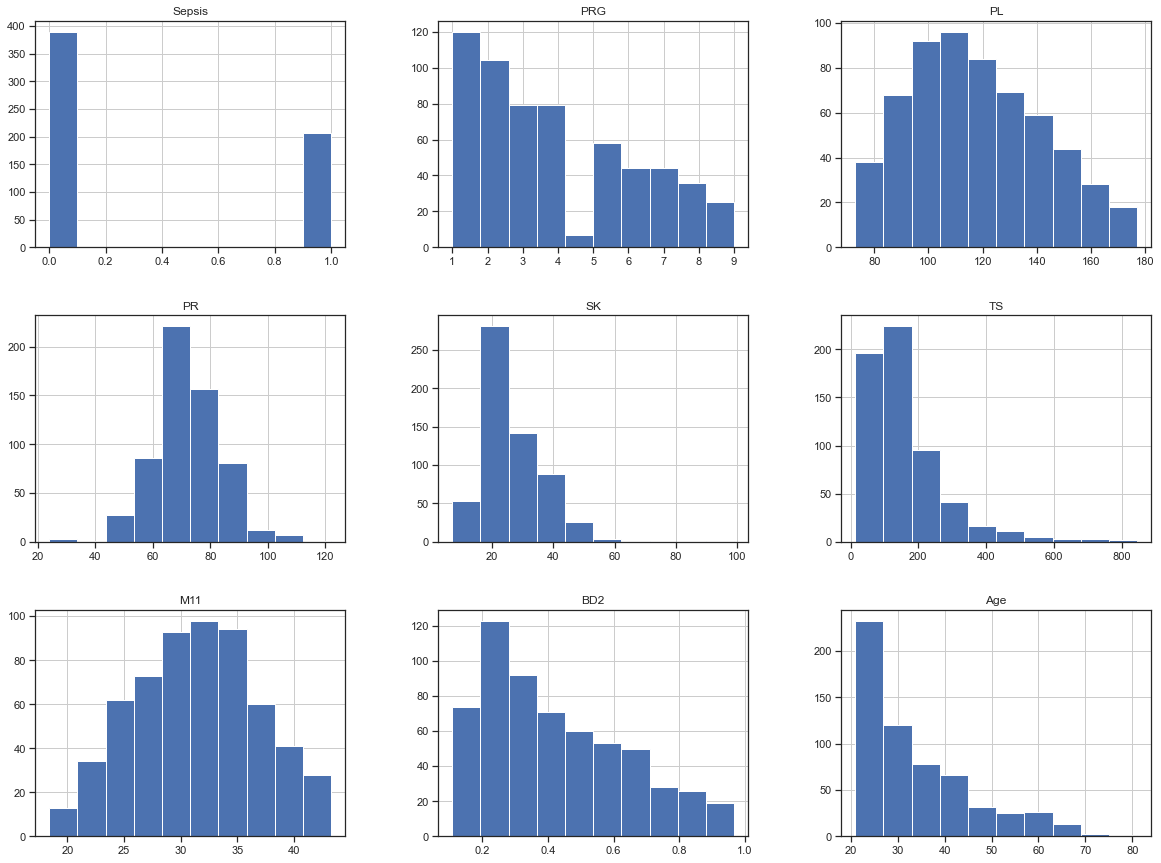

In [120]:
process_train_df.hist()
plt.show()

### Handling skewness of the dataframe

In [121]:
def handling_skew(df, train = True):
    for column in df.columns:
        if(train==True):
            if(column != 'Sepsis'):
                df[column] = np.log(df[column])
        else:
             df[column] = np.log(df[column])
handling_skew(process_train_df)
    

## Normalize the dataframe

In [122]:
def normalize(df, train=True):
    for column in df.columns:
        if(train==True):
            if(column != 'Sepsis'):
                df[column] = df[column] / df[column].abs().max()
        else:
            df[column] = df[column] / df[column].abs().max()
    return df

# view normalized data


In [123]:
process_train_df = normalize(process_train_df)

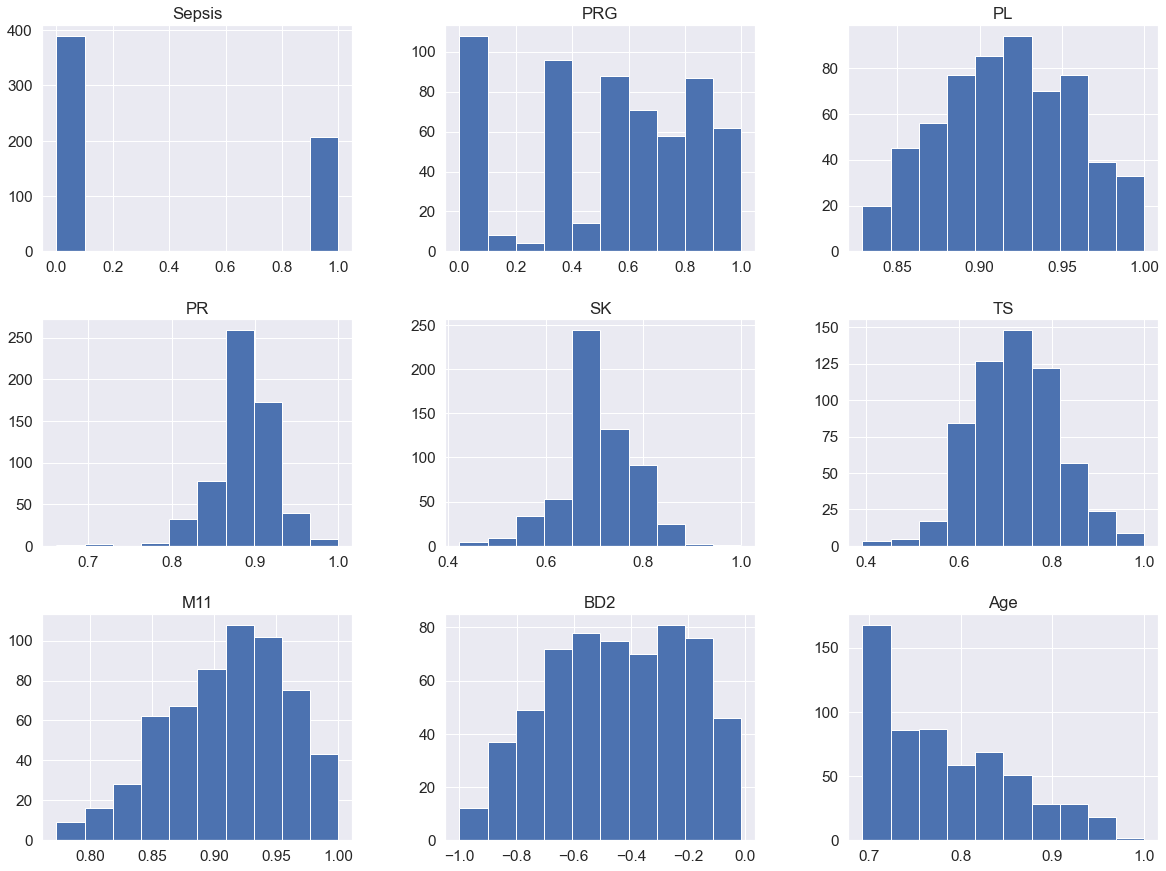

In [215]:
process_train_df.hist()
plt.show()

`Test Dataset`

In [125]:
process_test_df

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,1.0,109.0,38.0,18.000000,120.0,23.1,0.407,26
1,1.0,108.0,88.0,19.000000,121.5,27.1,0.400,24
2,6.0,96.0,81.0,27.500000,123.0,23.7,0.190,28
3,1.0,124.0,74.0,36.000000,124.5,27.8,0.441,30
4,7.0,150.0,78.0,29.000000,126.0,35.2,0.692,54
...,...,...,...,...,...,...,...,...
164,10.0,101.0,76.0,28.333333,180.0,32.9,0.171,63
165,2.0,122.0,70.0,27.000000,146.0,36.8,0.340,27
166,5.0,121.0,72.0,23.000000,112.0,26.2,0.245,30
167,1.0,126.0,60.0,27.000000,112.0,30.1,0.349,47


array([[<AxesSubplot:title={'center':'PRG'}>,
        <AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PR'}>],
       [<AxesSubplot:title={'center':'SK'}>,
        <AxesSubplot:title={'center':'TS'}>,
        <AxesSubplot:title={'center':'M11'}>],
       [<AxesSubplot:title={'center':'BD2'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

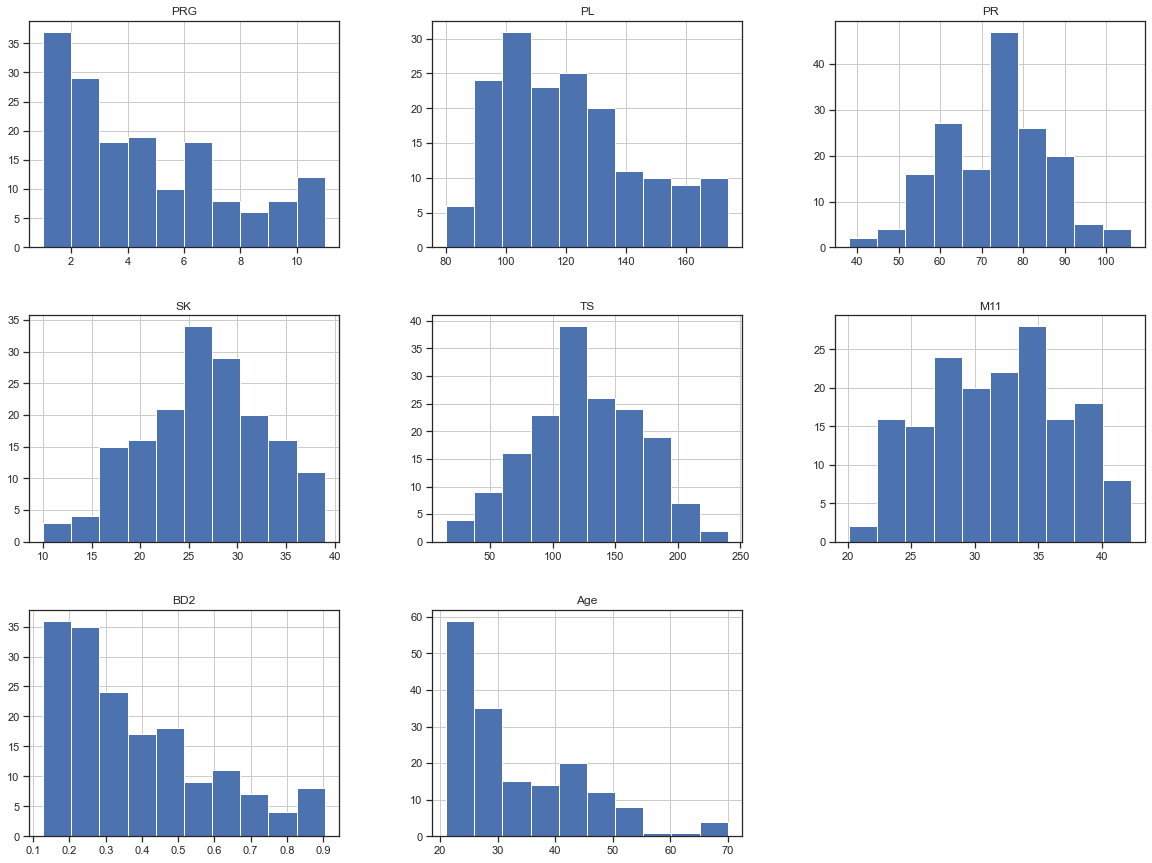

In [126]:
process_test_df.hist()

### Handling skewness

In [127]:
handling_skew(process_test_df, train=False)

### Normalize the dataset

In [128]:
process_test_df = normalize(process_test_df, train=False)

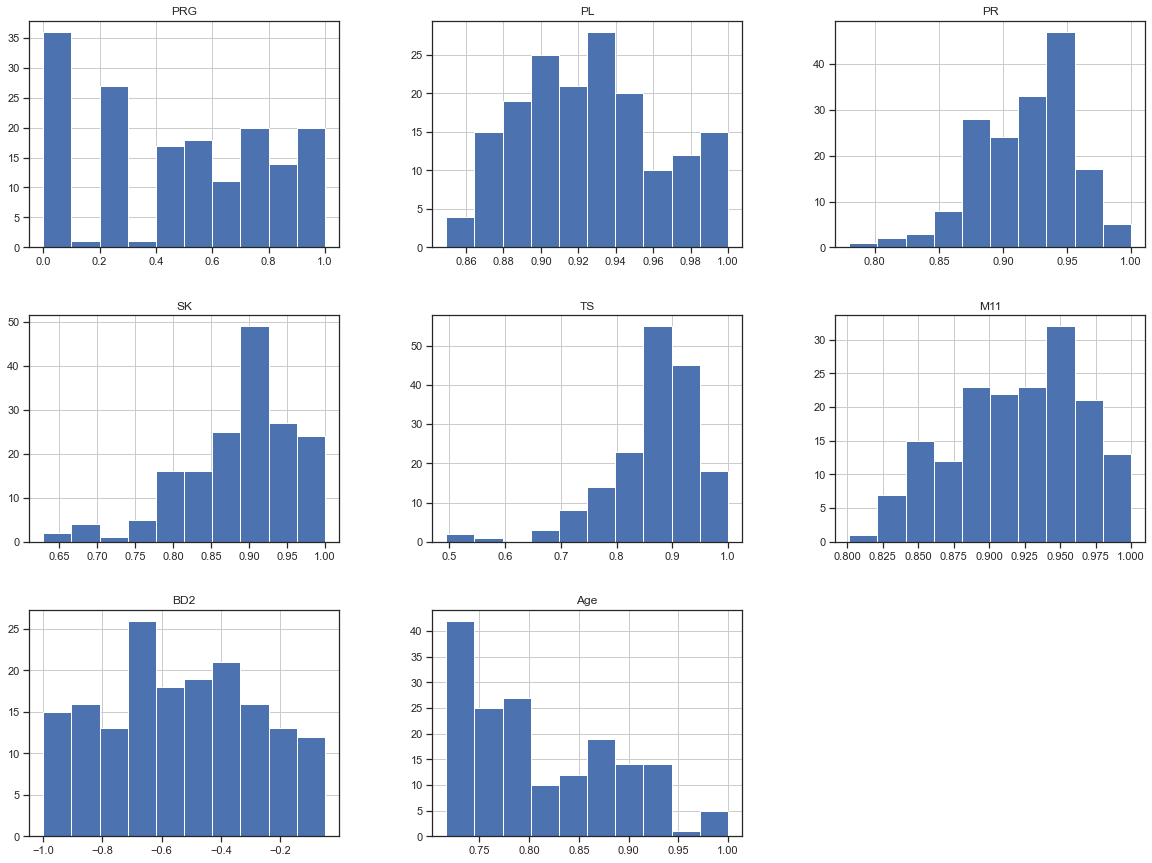

In [129]:
process_test_df.hist()
plt.show()

# Building model

This is a classification problem therefore the algorithm of choice are follow: 
*  Logistic Regression
*  Logistic Regression with normalization
*  Decisiontree
*  Random Forest

In [130]:
#Feature selection
x = process_train_df.drop(['Sepsis'], axis=1)
# Label
y = process_train_df['Sepsis']

In [131]:
# !conda install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 40)

In [132]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(476, 8)
(476,)
(120, 8)
(120,)


Generate a validation set

In [136]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.25, random_state=40)

In [137]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(357, 8)
(357,)
(119, 8)
(119,)


In [175]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()


In [141]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

## Logistic Regression using train test Split without scalling 

#### Train the model

In [176]:
log_model.fit(x_train, y_train)

/Users/nhatbuiminh/opt/anaconda3/envs/ProjectNew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [177]:
pred = log_model.predict(x_test)

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        80
           1       0.48      0.55      0.51        40

    accuracy                           0.65       120
   macro avg       0.62      0.62      0.62       120
weighted avg       0.66      0.65      0.66       120



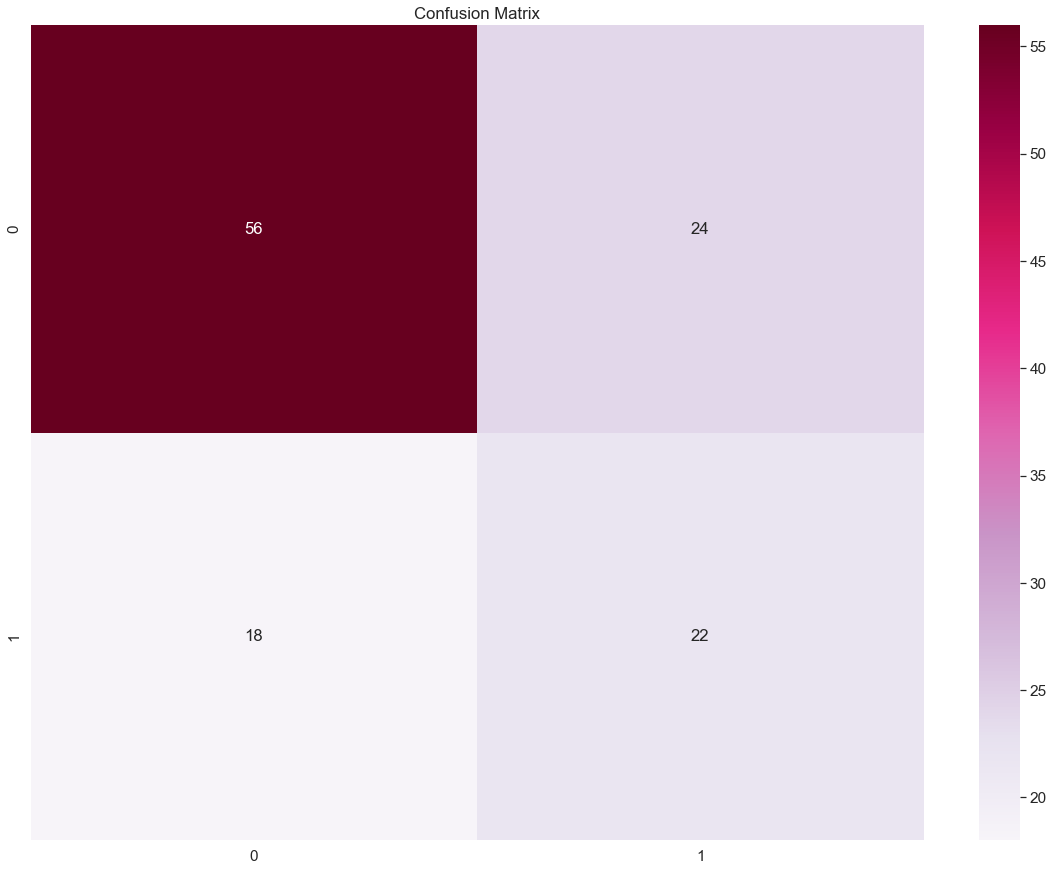

In [179]:
from sklearn.metrics import confusion_matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm ,annot = True,cmap  = 'PuRd') # font size
plt.title('Confusion Matrix')
plt.show()



### Logistic Regression using Polynorminal Non Validation

### Evaluate model

### Polynorminal Logistic Regression without Regularization

In [158]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
x_val = poly.fit_transform(x_val)


#### Scaling feature

In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_val = scaler.fit_transform(x_val)


In [160]:
from sklearn.linear_model import LogisticRegression
poly_norm_log = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=1000, 
                         class_weight='balanced')

In [161]:
poly_norm_log.fit(x_train, y_train.ravel())

/Users/nhatbuiminh/opt/anaconda3/envs/ProjectNew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, penalty='none',
                   random_state=0, solver='saga')

In [169]:
poly_norm_log_pred = poly_norm_log.predict(x_test)    

In [173]:
print(classification_report(y_test,poly_norm_log_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        80
           1       0.47      0.60      0.53        40

    accuracy                           0.64       120
   macro avg       0.62      0.63      0.62       120
weighted avg       0.67      0.64      0.65       120



<function matplotlib.pyplot.show(close=None, block=None)>

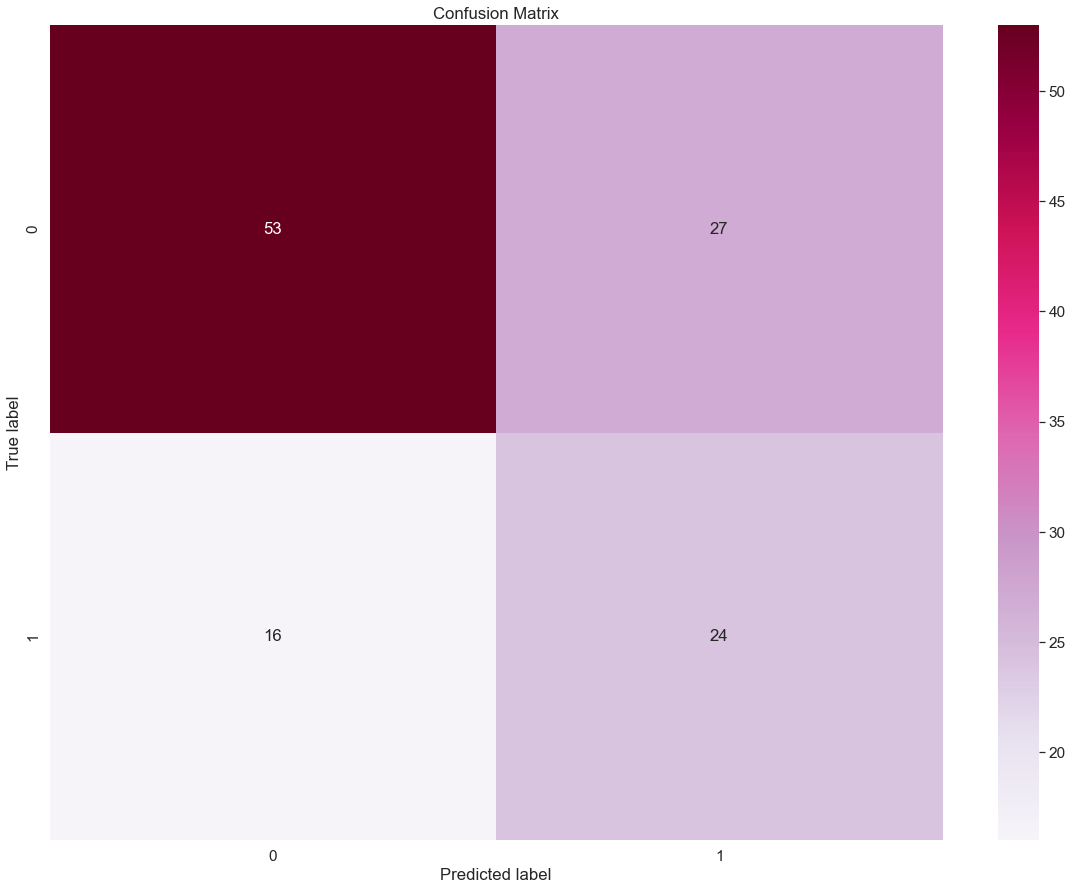

In [183]:
df_cm = pd.DataFrame(confusion_matrix(
    y_test, poly_norm_log_pred), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, annot=True, cmap='PuRd')  # font size
plt.title('Confusion Matrix')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show


In [204]:
pd.DataFrame(poly_norm_log_pred)

,0
0,1
1,0
2,0
3,0
4,0
...,...
115,1
116,0
117,0
118,0


<AxesSubplot:>

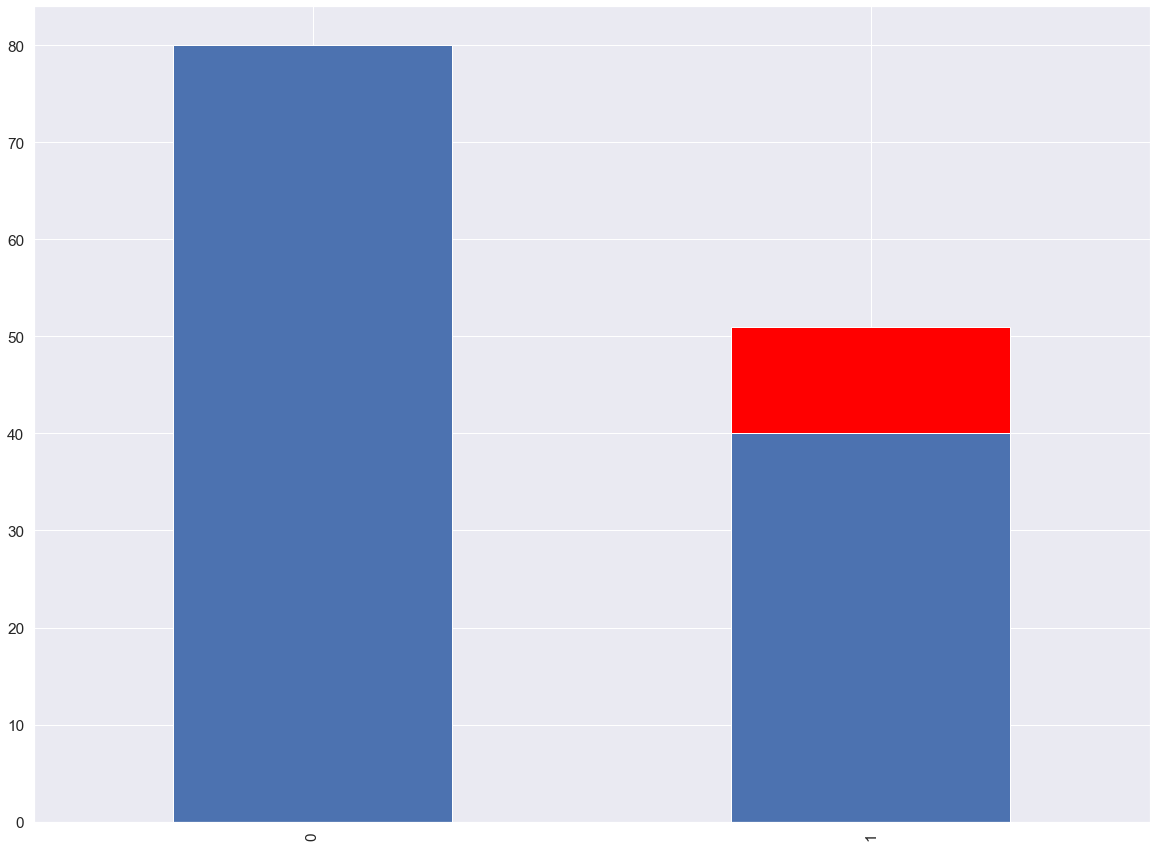

In [236]:
pd.Series(poly_norm_log_pred).value_counts().plot(kind='bar',color = 'red')
y_test.value_counts().plot(kind = 'bar')

### Polynorminal Logistic Regression with Regulariazation

### Decision Tree 

### Random Forest

<a id="7"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>7. References</strong></h1>

*****

<a id="Link1"></a>
- [1] [What Are Platelets and Why Are They Important?](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important#:~:text=A%20normal%20platelet%20count%20ranges,complete%20blood%20count%20(CBC).)

<a id="Link2"></a>
- [2] [What's a normal resting heart rate?](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,to%2040%20beats%20per%20minute.)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

<a id="Link3"></a>
- [3] [What Is a Potassium Blood Test?](https://www.webmd.com/a-to-z-guides/potassium-blood-test)

- [1] [What Are Platelets and Why Are They Important?](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important#:~:text=A%20normal%20platelet%20count%20ranges,complete%20blood%20count%20(CBC).)


- [What's a normal resting heart rate?](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,to%2040%20beats%20per%20minute.)


- [TSH (Thyroid Stimulating Hormone) Test](https://www.healthline.com/health/tsh)